# Generating SQL for SQLite using Ollama, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-ollama-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
import sys
print("\n".join(sys.path))

/home/gongai/anaconda3/envs/vanna/lib/python311.zip
/home/gongai/anaconda3/envs/vanna/lib/python3.11
/home/gongai/anaconda3/envs/vanna/lib/python3.11/lib-dynload

/home/gongai/.local/lib/python3.11/site-packages
/home/gongai/anaconda3/envs/vanna/lib/python3.11/site-packages
/home/gongai/projects/wgong/api_keys/apikeystore
/home/gongai/projects/wgong/ssadata/src


In [2]:
import warnings
import re

warnings.filterwarnings('ignore', category=DeprecationWarning, message='^Number of requested results')
# warnings.filterwarnings('ignore', category=DeprecationWarning, message=re.escape(r'^Some regex pattern'))

import os

import re
from time import time
from datetime import datetime 

from vanna.ollama import Ollama
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

In [3]:
model_name = "llama3"  # "llama3.1"
CONFIG = {
    'model': model_name,   # 'mistral' # "starcoder2"
    'options': {
        'gpu': True,
    }
}

file_db = "~/Downloads/datasets/chinook.db"

clean_and_train = True  # False  

sql_id = 1
NUM_RETRY = 3

allow_llm_to_see_data = True
# allow_llm_to_see_data (bool): Whether to allow the LLM to see the data (for the purposes of introspecting the data to generate the final SQL).

In [4]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

def remove_collections(collection_name=None, ACCEPTED_TYPES = ["sql", "ddl", "documentation"]):
    if not collection_name:
        collections = ACCEPTED_TYPES
    elif isinstance(collection_name, str):
        collections = [collection_name]
    elif isinstance(collection_name, list):
        collections = collection_name
    else:
        print(f"\t{collection_name} is unknown: Skipped")
        return

    for c in collections:
        if not c in ACCEPTED_TYPES:
            print(f"\t{c} is unknown: Skipped")
            continue
            
        # print(f"vn.remove_collection('{c}')")
        vn.remove_collection(c)

def strip_brackets(ddl):
    """
    This function removes square brackets from table and column names in a DDL script.
    
    Args:
        ddl (str): The DDL script containing square brackets.
    
    Returns:
        str: The DDL script with square brackets removed.
    """
    # Use regular expressions to match and replace square brackets
    pattern = r"\[([^\]]+)]"  # Match any character except ] within square brackets
    return re.sub(pattern, r"\1", ddl)

def my_vn_ask(question, sql_id, allow_llm_to_see_data=False, num_retry=NUM_RETRY, separator=80*'='):
    # allow retry by appending error msg to question
    print(f"\n{separator}\n# QUESTION - {sql_id}:  {question}\n{separator}\n")
    sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
        return sql, df, fig, err_msg

    for i_retry in range(num_retry-1):
        msg = f"*** RETRY {i_retry+1} ***" 
        print(msg)
        question = f"""
        For the question {question}, 
        the generated SQL statement {sql} results in the following exception {err_msg} .
        Please fix the error and re-generate the SQL
        """
        
        sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
        if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
            break       

    return sql, df, fig, err_msg  

In [5]:
vn = MyVanna(config=CONFIG)

In [6]:
hostname = os.uname().nodename
print("Hostname:", hostname)

Hostname: ducklover1


In [7]:
file_db = os.path.abspath(os.path.expanduser(file_db))
vn.connect_to_sqlite(file_db)

In [8]:
vn.run_sql_is_set

True

In [9]:
if clean_and_train:
    remove_collections()

## Training

### [SQLite sample database](https://www.sqlitetutorial.net/sqlite-sample-database/)

You only need to train once. Do not train again unless you want to add more training data.

In [10]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

In [11]:
df_ddl

,type,sql
0,table,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


In [12]:
if clean_and_train:
    for ddl in df_ddl['sql'].to_list():
        ddl = strip_brackets(ddl)
        vn.train(ddl=ddl)

    # Sometimes you may want to add documentation about your business terminology or definitions.
    vn.train(documentation="In the chinook database invoice means order")

    doc_str = """
    In the 'customers' table, address column names do not have 'Billing' prefix, 
    e.g. country column name is 'country', not 'BillingCountry'
    """
    vn.train(documentation=doc_str)


Adding ddl: CREATE TABLE "albums"
(
    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Title NVARCHAR(160)  NOT NULL,
    ArtistId INTEGER  NOT NULL,
    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE sqlite_sequence(name,seq)
Adding ddl: CREATE TABLE "artists"
(
    ArtistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Name NVARCHAR(120)
)
Adding ddl: CREATE TABLE "customers"
(
    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    FirstName NVARCHAR(40)  NOT NULL,
    LastName NVARCHAR(20)  NOT NULL,
    Company NVARCHAR(80),
    Address NVARCHAR(70),
    City NVARCHAR(40),
    State NVARCHAR(40),
    Country NVARCHAR(40),
    PostalCode NVARCHAR(10),
    Phone NVARCHAR(24),
    Fax NVARCHAR(24),
    Email NVARCHAR(60)  NOT NULL,
    SupportRepId INTEGER,
    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TAB

In [13]:
# show training data
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,039f9d54-59f7-5f29-8c04-14dbc3e95671-ddl,None,"CREATE TABLE ""artists""\r\n(\r\n ArtistId IN...",ddl
1,0db84e3d-ef41-563c-803e-21c1b985dc19-ddl,None,"CREATE TABLE ""invoices""\r\n(\r\n InvoiceId ...",ddl
2,10cba811-ddba-5042-9e90-d764dfcd1629-ddl,None,"CREATE INDEX IFK_InvoiceCustomerId ON ""invoice...",ddl
3,2c711317-b93d-5f60-a728-cb1c6fcbc040-ddl,None,"CREATE INDEX IFK_CustomerSupportRepId ON ""cust...",ddl
4,37319c81-65f7-50ee-956b-795de244bee5-ddl,None,"CREATE TABLE sqlite_stat1(tbl,idx,stat)",ddl
5,40bd77cd-e1de-5872-8693-624117ff413c-ddl,None,"CREATE INDEX IFK_InvoiceLineInvoiceId ON ""invo...",ddl
6,41130543-7164-562a-90a7-0fd0a409c154-ddl,None,"CREATE TABLE ""albums""\r\n(\r\n AlbumId INTE...",ddl
7,458debc8-8082-5450-a17a-66028bd55ace-ddl,None,"CREATE TABLE ""playlists""\r\n(\r\n PlaylistI...",ddl
8,4815f3fd-925b-53ce-9dfa-0e4285d5abd3-ddl,None,"CREATE TABLE ""invoice_items""\r\n(\r\n Invoi...",ddl
9,48d484e9-984c-58ff-b391-75521c69d486-ddl,None,"CREATE INDEX IFK_PlaylistTrackTrackId ON ""play...",ddl


```sql

SELECT name FROM sqlite_master WHERE type = 'table';

```

```sql

SELECT c.CustomerId, SUM(il.Quantity) AS TotalAlbums
FROM Customers c
JOIN invoices i  ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalAlbums DESC
LIMIT 5

```


## Ask AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

### warm-up





# QUESTION :  How many customers are there



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT COUNT(*) 
FROM "customers";


[( <SQL> )]
generated SQL statement



SELECT COUNT(*) 
FROM "customers";


[( <DataFrame> )]
queried dataframe



,COUNT(*)
0,59



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
fig = px.bar(df, x=[''], y=[df['COUNT(*)'].values], labels={'x': '', 'y': 'Number of Customers'}, title='Number of Customers')

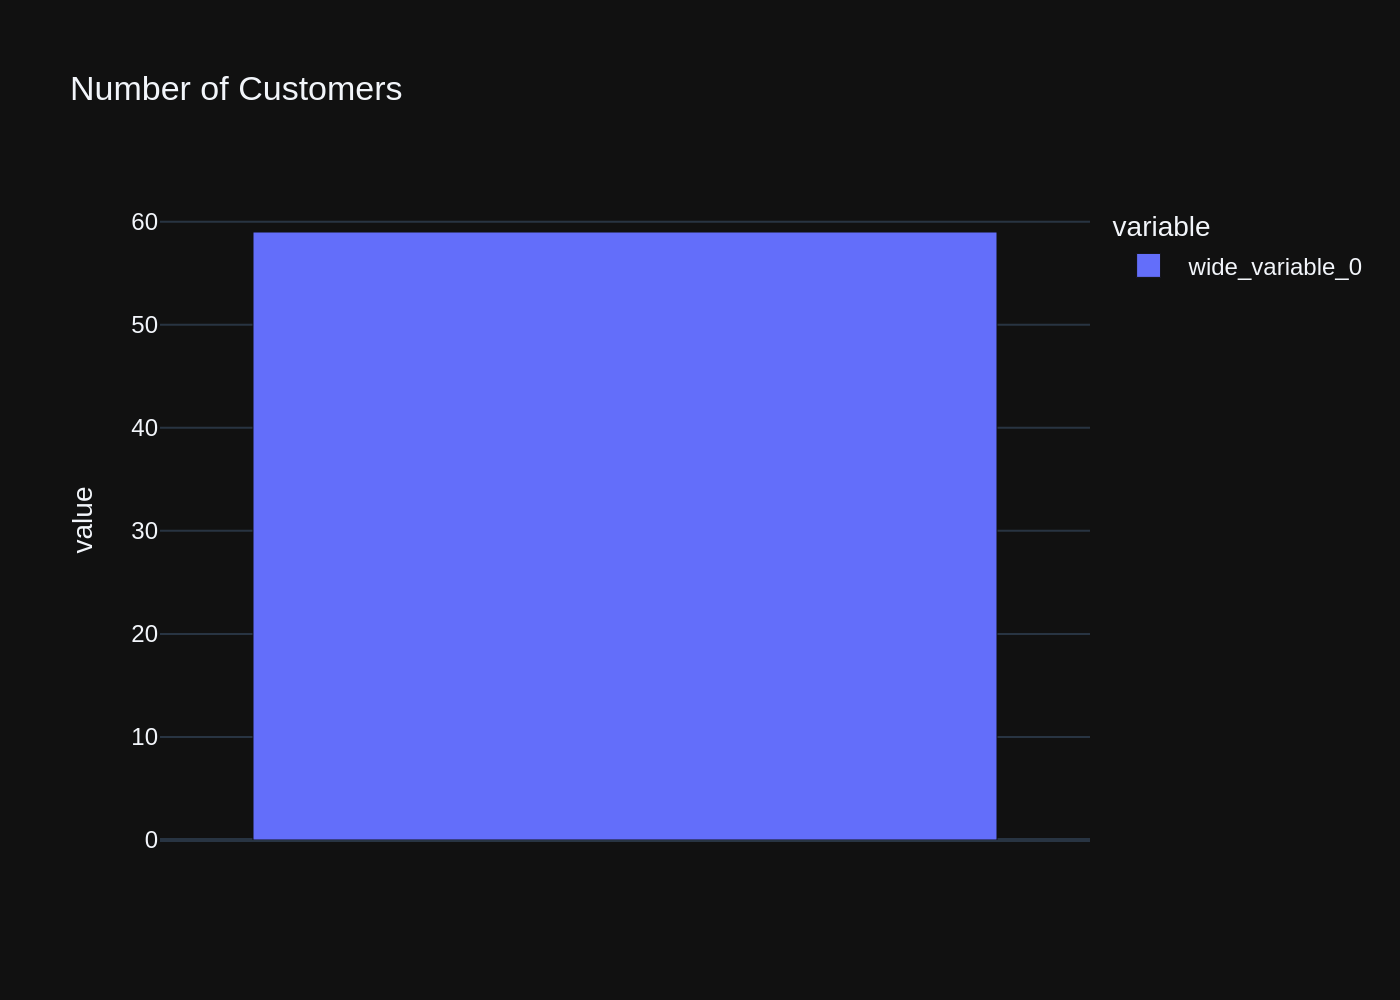

elapsed_time = 5.017218351364136


In [14]:
ts_start = time()
question = "How many customers are there"
resp = vn.ask_adaptive(question=question)
ts_stop = time()
elapsed_time = ts_stop - ts_start
print(f"elapsed_time = {elapsed_time}")

### Loop over questions

In [15]:
questions = [
    "Can you list all tables in the SQLite database catalog?",
    "which table stores customer's orders",
    "How many customers are there",
    "what are the top 5 countries that customers come from?",
    "List all albums and their corresponding artist names  ",
    """Find all tracks with a name containing "What" (case-insensitive) """,
    "Get the total number of invoices for each customer",
    "Find the total number of invoices per country",
    "List all invoices with a total exceeding $10",
    "Find all invoices since 2010 and the total amount invoiced:",
    "List all employees and their reporting manager's name (if any):",
    " Get the average invoice total for each customer:",
    "Find the top 5 most expensive tracks (based on unit price):",
    "List all genres and the number of tracks in each genre:",
    "Get all genres that do not have any tracks associated with them:",
    "List all customers who have not placed any orders:",
    """ 
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    """,
    "List all customers from Canada and their email addresses:",
    "Find the customer with the most invoices ",
    "Find the customer who bought the most albums in total quantity (across all invoices):",
    """      
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    """,
    """  
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    """,
    "Get all playlists containing at least 10 tracks and the total duration of those tracks:",
    "Identify artists who have albums with tracks appearing in multiple genres:",
]





# QUESTION  - 2:  Can you list all tables in the SQLite database catalog?



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT name FROM sqlite_master WHERE type='table';


[( <SQL> )]
generated SQL statement



SELECT name FROM sqlite_master WHERE type='table';


[( <DataFrame> )]
queried dataframe



,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
import numpy as np

fig = px.bar(df, x='name', y=np.zeros(len(df)))

fig.update_layout(title_text="SQLite Database Tables")

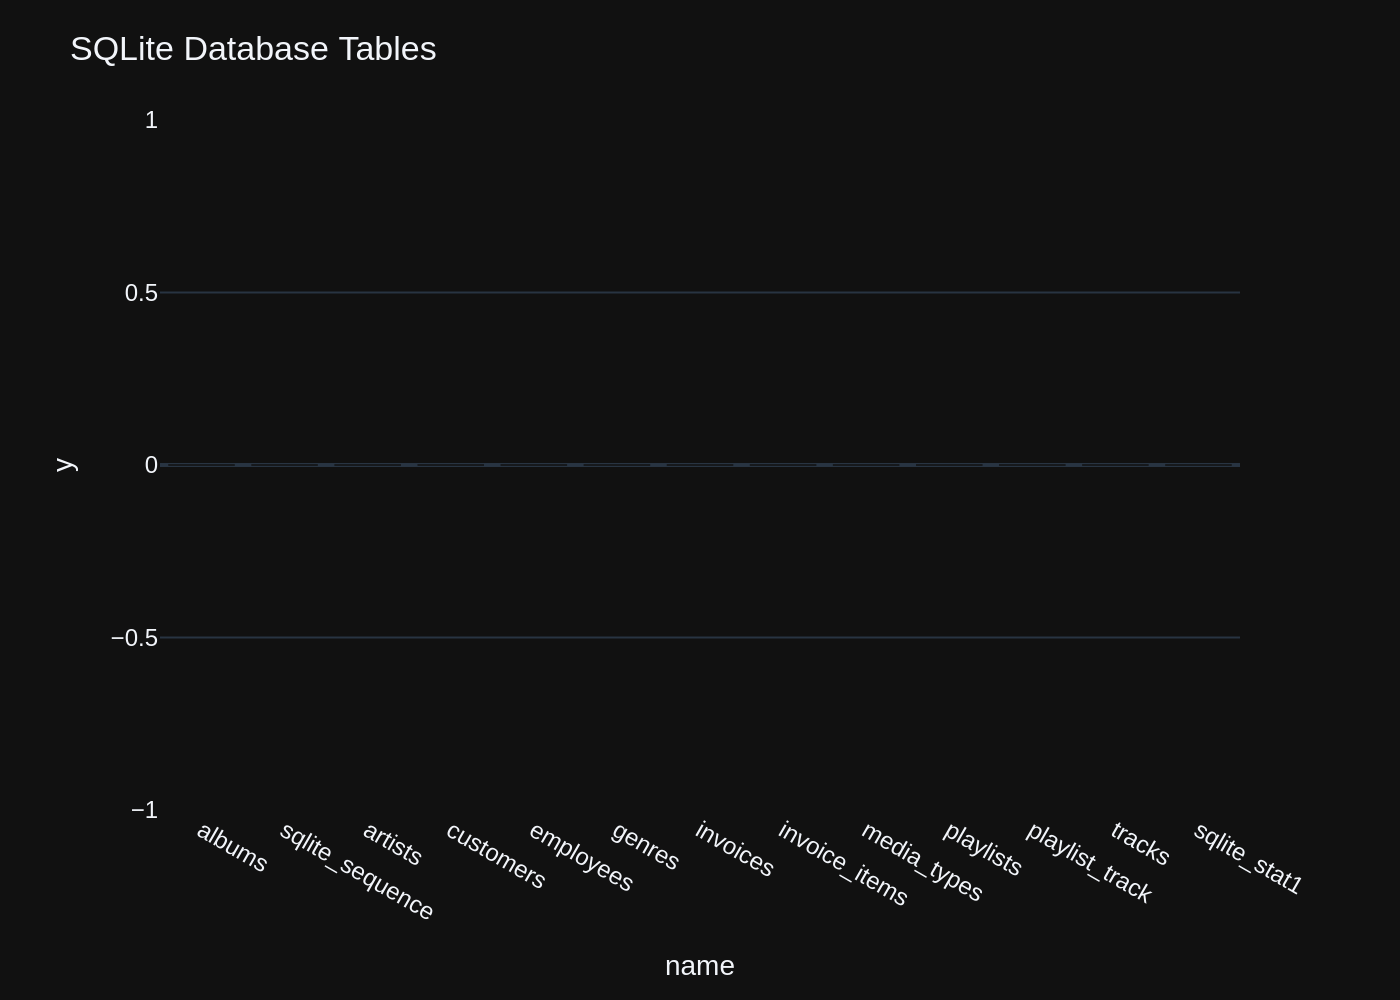





# QUESTION  - 3:  which table stores customer's orders



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT * 
FROM "invoices";


[( <SQL> )]
generated SQL statement



SELECT * 
FROM "invoices";


[( <DataFrame> )]
queried dataframe



,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
5,6,37,2009-01-19 00:00:00,Berger Straße 10,Frankfurt,None,Germany,60316,0.99
6,7,38,2009-02-01 00:00:00,Barbarossastraße 19,Berlin,None,Germany,10779,1.98
7,8,40,2009-02-01 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,1.98
8,9,42,2009-02-02 00:00:00,"9, Place Louis Barthou",Bordeaux,None,France,33000,3.96
9,10,46,2009-02-03 00:00:00,3 Chatham Street,Dublin,Dublin,Ireland,None,5.94



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
import numpy as np

fig = px.bar(df, x='InvoiceId', y='Total')


# If there is only one value in the dataframe:
fig = go.Bar(x=['Single Value'], y=[df['Total'].values[0]], name='Single Value')
fig.update_layout(title_text='Results of Customer Orders Query', title_font_size=16)

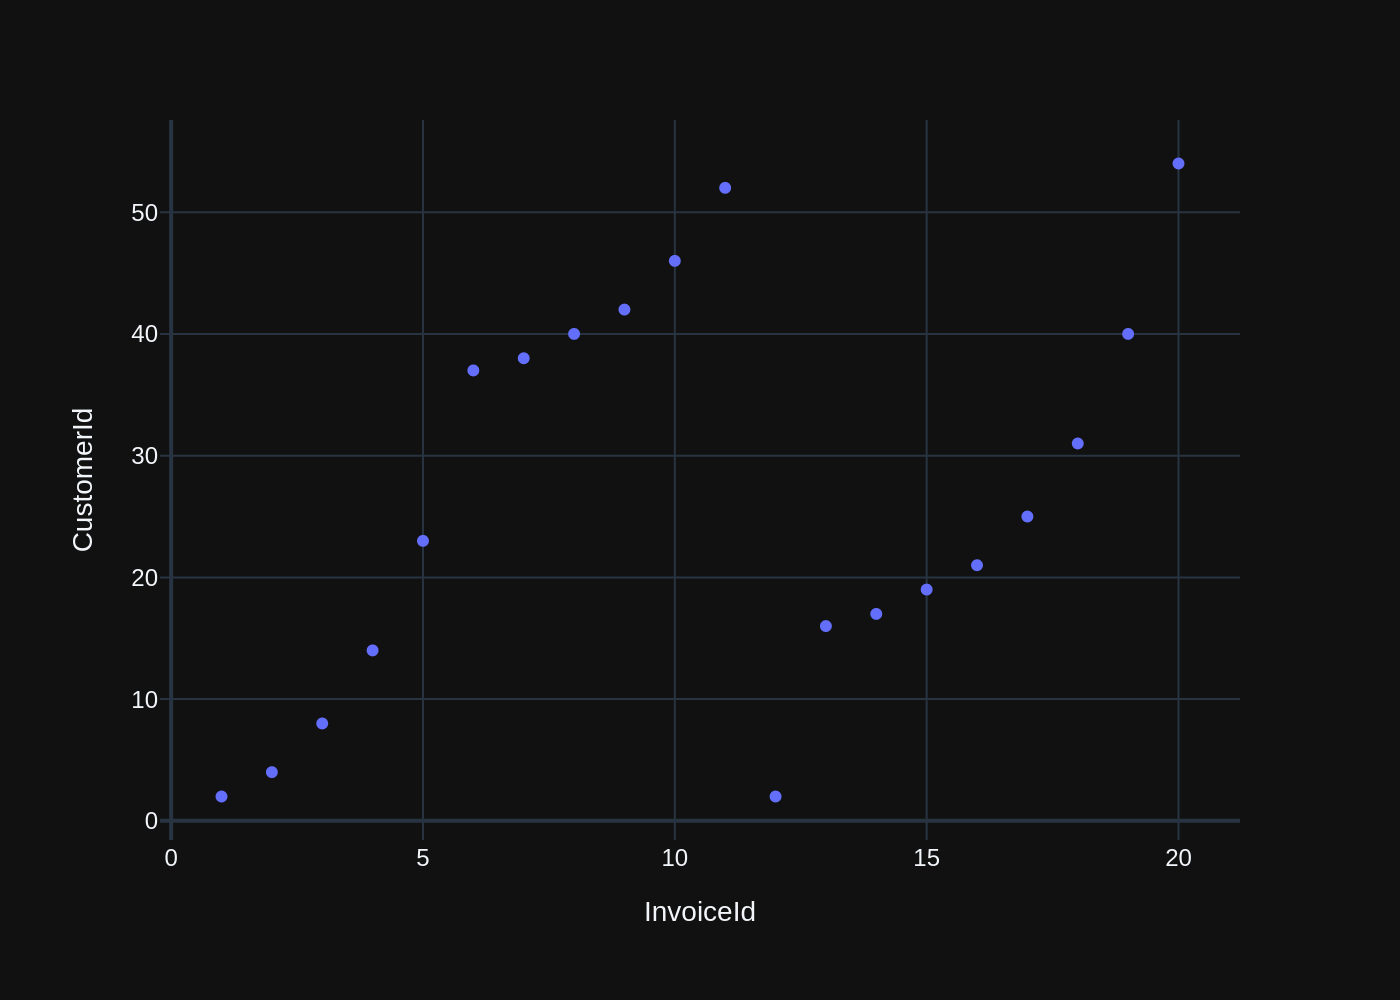





# QUESTION  - 4:  How many customers are there



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT COUNT(*) 
FROM "customers";


[( <SQL> )]
generated SQL statement



SELECT COUNT(*) 
FROM "customers";


[( <DataFrame> )]
queried dataframe



,COUNT(*)
0,59



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

fig = go.Figure(data=[go.Indicator(
    mode="number",
    value= df['COUNT(*)'].values[0],
    number=dict(text=df['COUNT(*)'].values[0], font_size=24)
)])
fig.update_layout(title_text="Number of Customers", title_font_size=14)

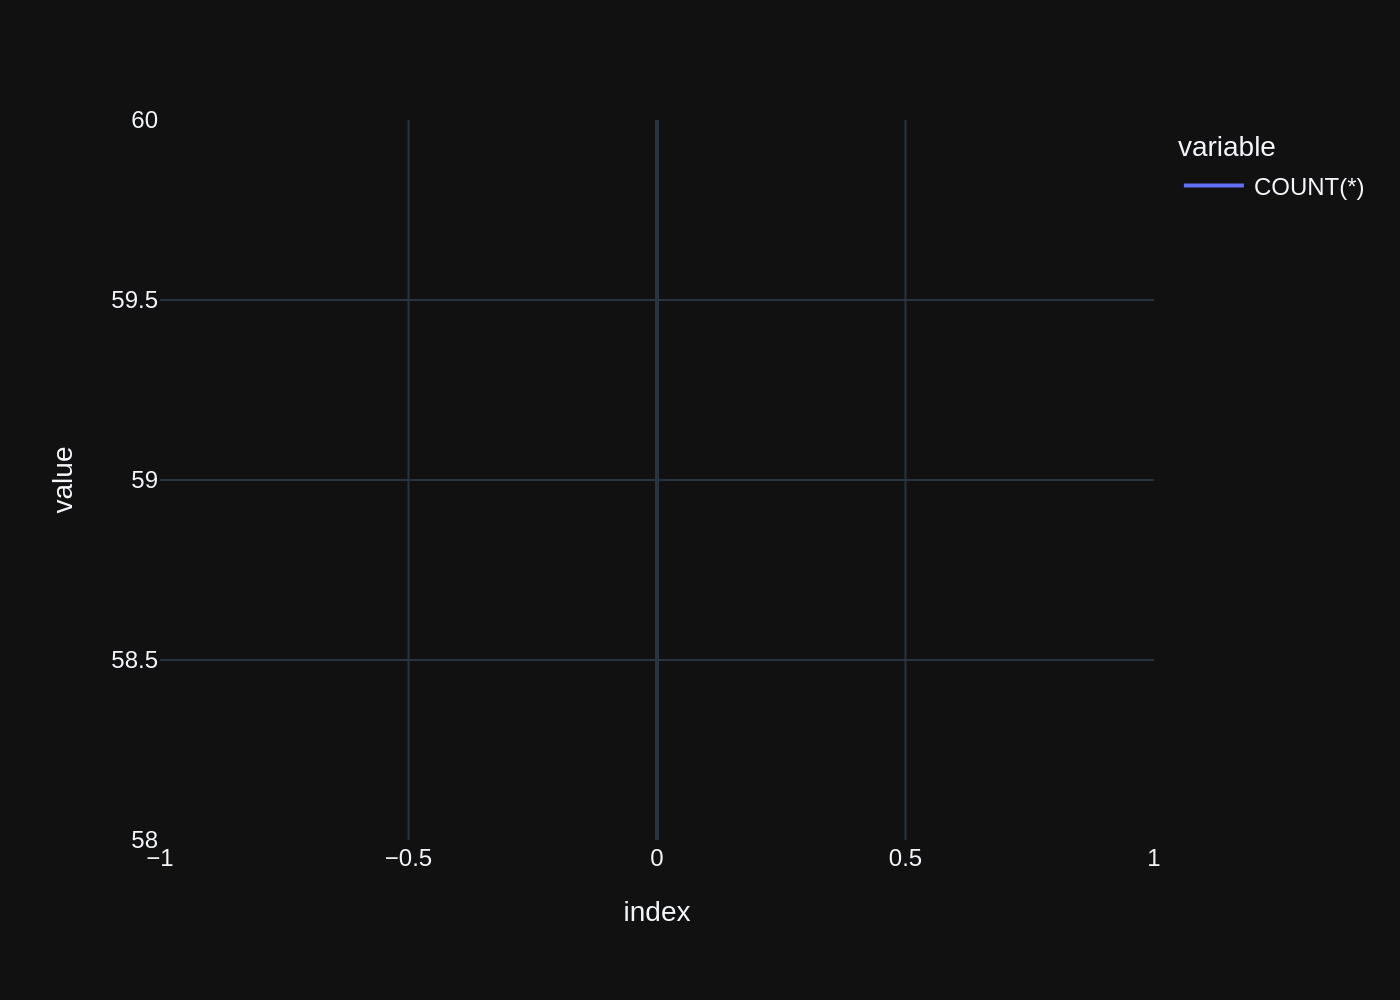





# QUESTION  - 5:  what are the top 5 countries that customers come from?



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT country, COUNT(*) AS total_customers
FROM "customers"
GROUP BY country
ORDER BY total_customers DESC
LIMIT 5


[( <DataFrame> )]
queried dataframe



,Country,total_customers
0,USA,13
1,Canada,8
2,France,5
3,Brazil,5
4,Germany,4



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
import pandas as pd

fig = px.bar(df, x='Country', y='total_customers')
fig.update_layout(title_text="Top 5 Countries Customers Come From")

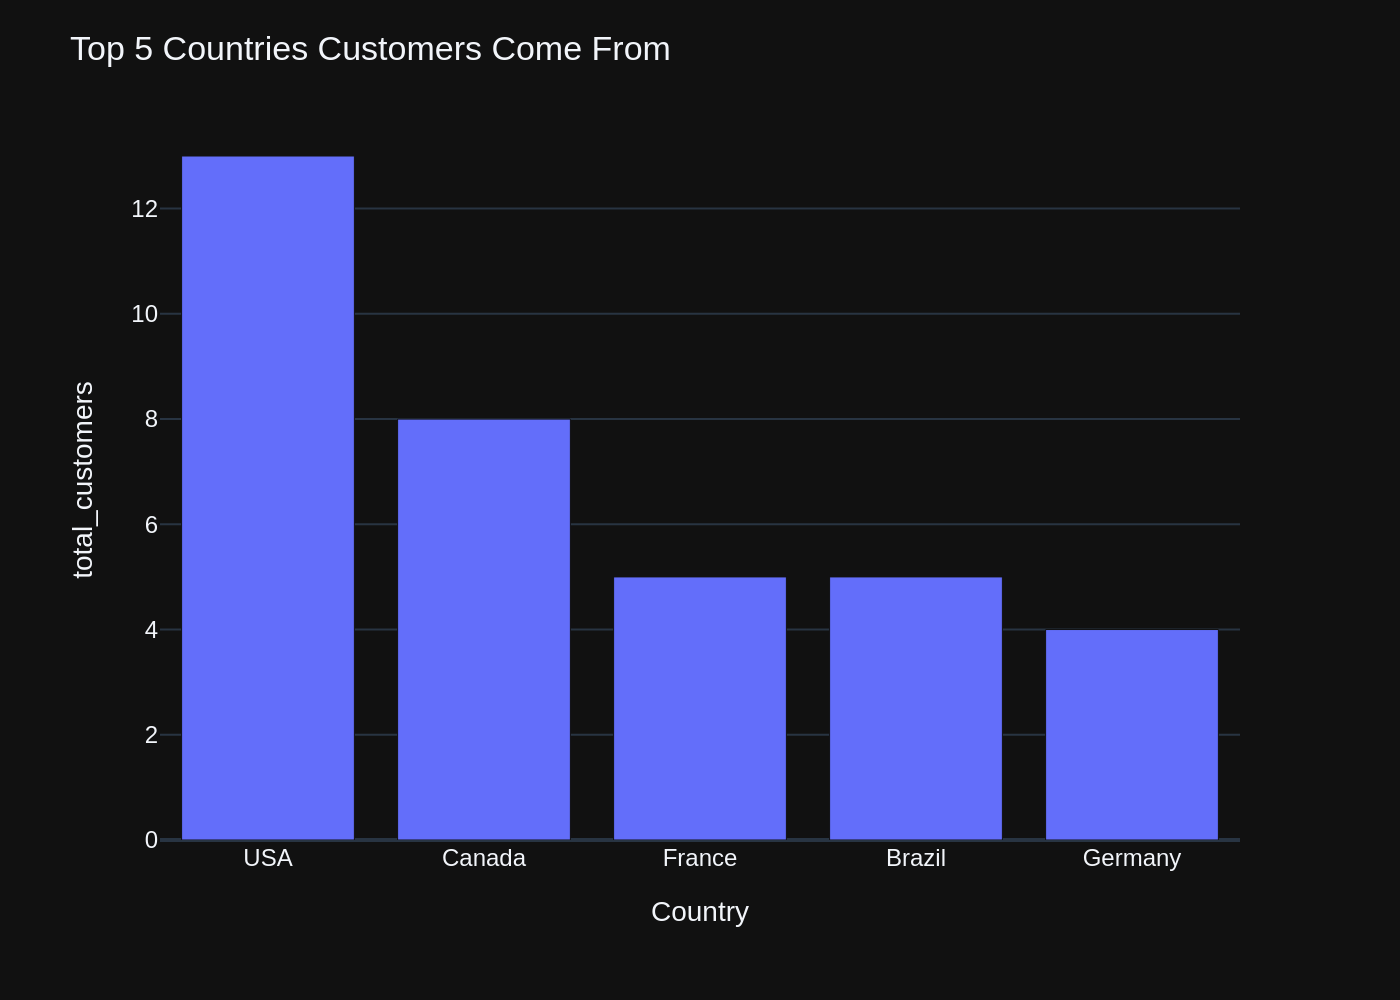





# QUESTION  - 6:  List all albums and their corresponding artist names  



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT a.Title, a.ArtistId, ar.Name
FROM "albums" a
JOIN "artists" ar ON a.ArtistId = ar.ArtistId


[( <DataFrame> )]
queried dataframe



,Title,ArtistId,Name
0,For Those About To Rock We Salute You,1,AC/DC
1,Balls to the Wall,2,Accept
2,Restless and Wild,2,Accept
3,Let There Be Rock,1,AC/DC
4,Big Ones,3,Aerosmith
5,Jagged Little Pill,4,Alanis Morissette
6,Facelift,5,Alice In Chains
7,Warner 25 Anos,6,Antônio Carlos Jobim
8,Plays Metallica By Four Cellos,7,Apocalyptica
9,Audioslave,8,Audioslave



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
import numpy as np

fig = px.bar(df, x='Name', y='Title', title='Albums and Artists')

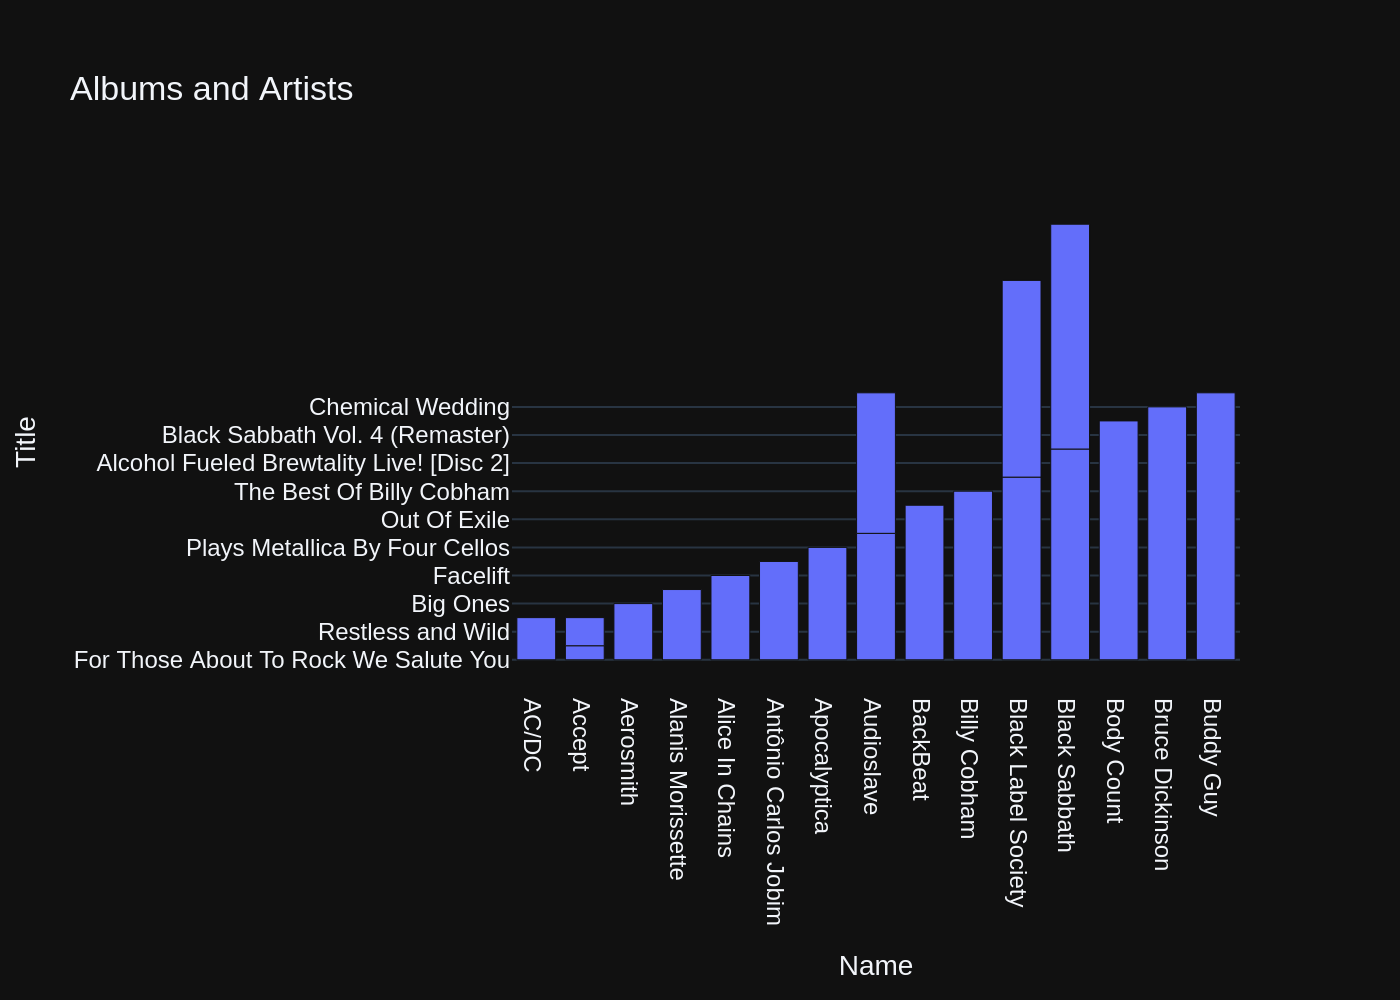





# QUESTION  - 7:  Find all tracks with a name containing "What" (case-insensitive) 



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT *
FROM "tracks"
WHERE Name LIKE '%what%' COLLATE NOCASE;


[( <SQL> )]
generated SQL statement



SELECT *
FROM "tracks"
WHERE Name LIKE '%what%' COLLATE NOCASE;


[( <DataFrame> )]
queried dataframe



,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,26,What It Takes,5,1,1,"Steven Tyler, Joe Perry, Desmond Child",310622,10144730,0.99
1,88,What You Are,10,1,1,Audioslave/Chris Cornell,249391,5988186,0.99
2,130,Do what cha wanna,13,1,2,George Duke,274155,9018565,0.99
3,342,What is and Should Never Be,30,1,1,Jimmy Page/Robert Plant,260675,8497116,0.99
4,607,So What,48,1,2,Miles Davis,564009,18360449,0.99
5,960,What A Day,76,1,1,"Mike Bordin, Billy Gould, Mike Patton",158275,5203430,0.99
6,1000,What If I Do?,80,1,1,"Dave Grohl, Taylor Hawkins, Nate Mendel, Chris...",302994,9929799,0.99
7,1039,What Now My Love,83,1,12,carl sigman/gilbert becaud/pierre leroyer,149995,4913383,0.99
8,1145,Whatsername,89,1,4,Green Day,252316,8244843,0.99
9,1440,"Whatever It Is, I Just Can't Stop",116,1,1,"Jay Kay/Kay, Jay",247222,8249453,0.99



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
import pandas as pd

fig = px.bar(df, x='Name', y='UnitPrice')
fig.update_layout(title="Track Prices", xaxis_title="Track Name", yaxis_title="Price")

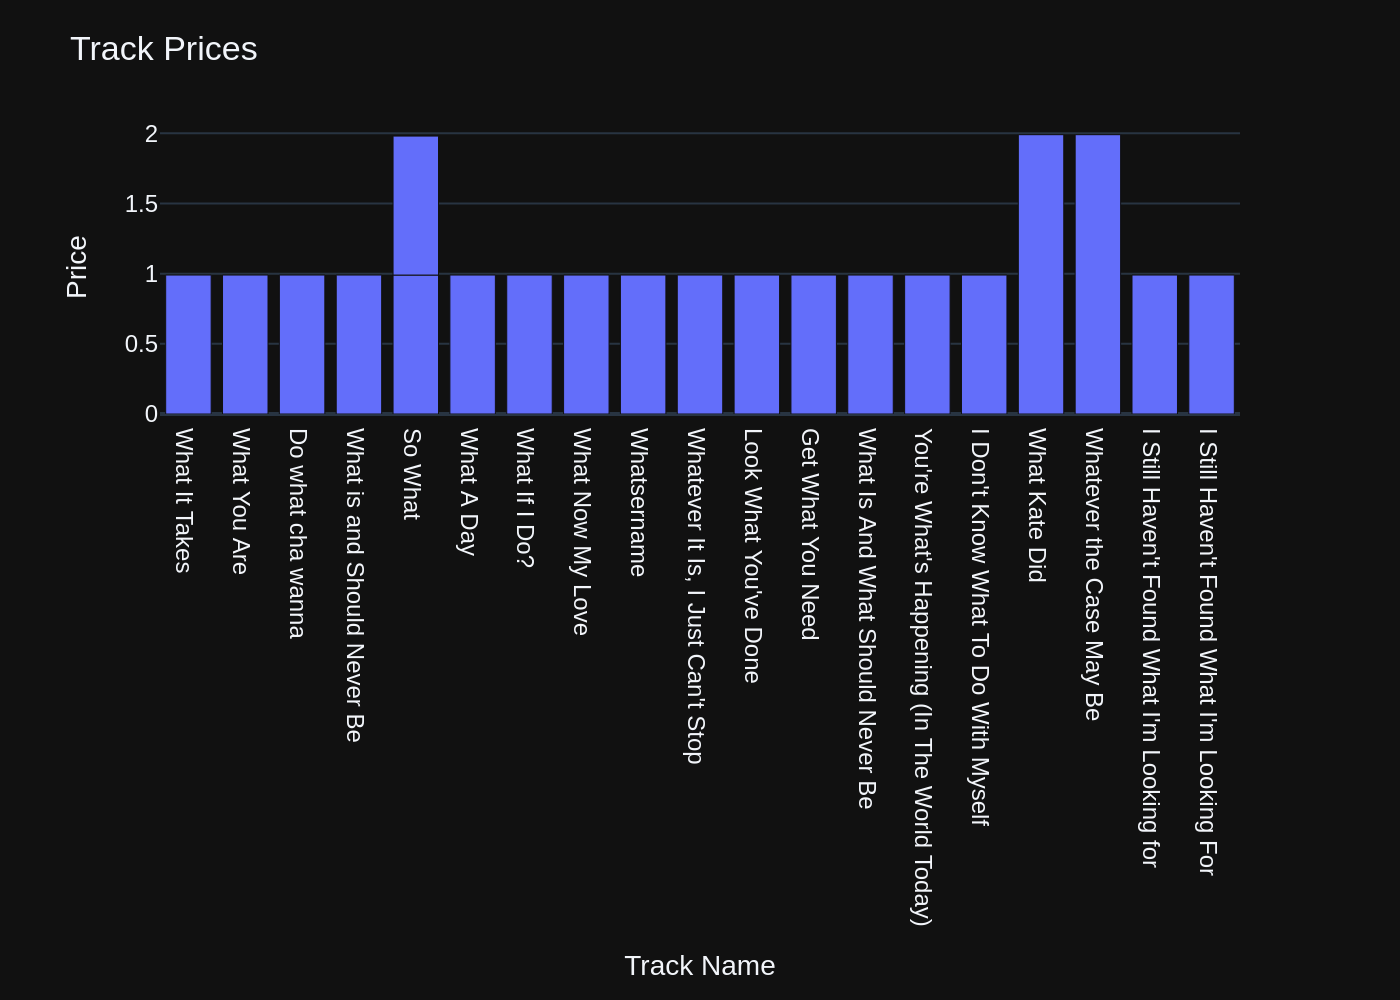





# QUESTION  - 8:  Get the total number of invoices for each customer



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT c.FirstName, c.LastName, COUNT(i.InvoiceId) AS TotalInvoices
FROM "customers" c
JOIN "invoices" i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId, c.FirstName, c.LastName LIMIT 20


[( <DataFrame> )]
queried dataframe



,FirstName,LastName,TotalInvoices
0,Luís,Gonçalves,7
1,Leonie,Köhler,7
2,François,Tremblay,7
3,Bjørn,Hansen,7
4,František,Wichterlová,7
5,Helena,Holý,7
6,Astrid,Gruber,7
7,Daan,Peeters,7
8,Kara,Nielsen,7
9,Eduardo,Martins,7



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
import pandas as pd

fig = px.bar(df, x='FirstName', y='TotalInvoices', barmode='group')

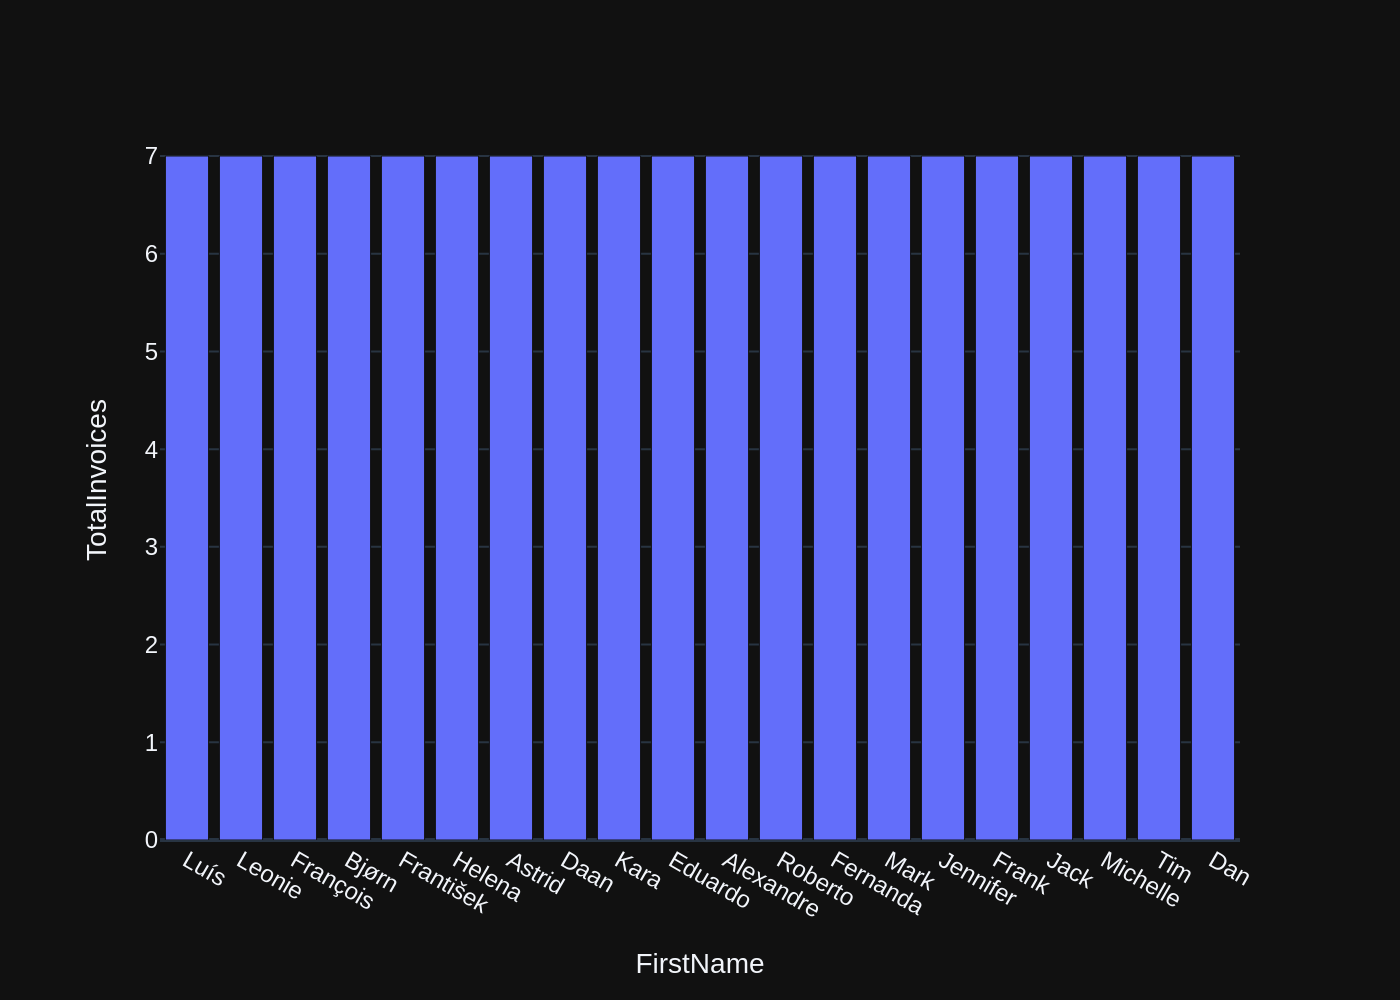





# QUESTION  - 9:  Find the total number of invoices per country



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT c.Country, COUNT(i.InvoiceId) AS TotalInvoices
FROM "customers" c
JOIN "invoices" i ON c.CustomerId = i.CustomerId
GROUP BY c.Country


[( <DataFrame> )]
queried dataframe



,Country,TotalInvoices
0,Argentina,7
1,Australia,7
2,Austria,7
3,Belgium,7
4,Brazil,35
5,Canada,56
6,Chile,7
7,Czech Republic,14
8,Denmark,7
9,Finland,7



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



```
import plotly.express as px
fig = px.bar(df, x='Country', y='TotalInvoices')
fig.update_layout(title='Total Number of Invoices per Country')

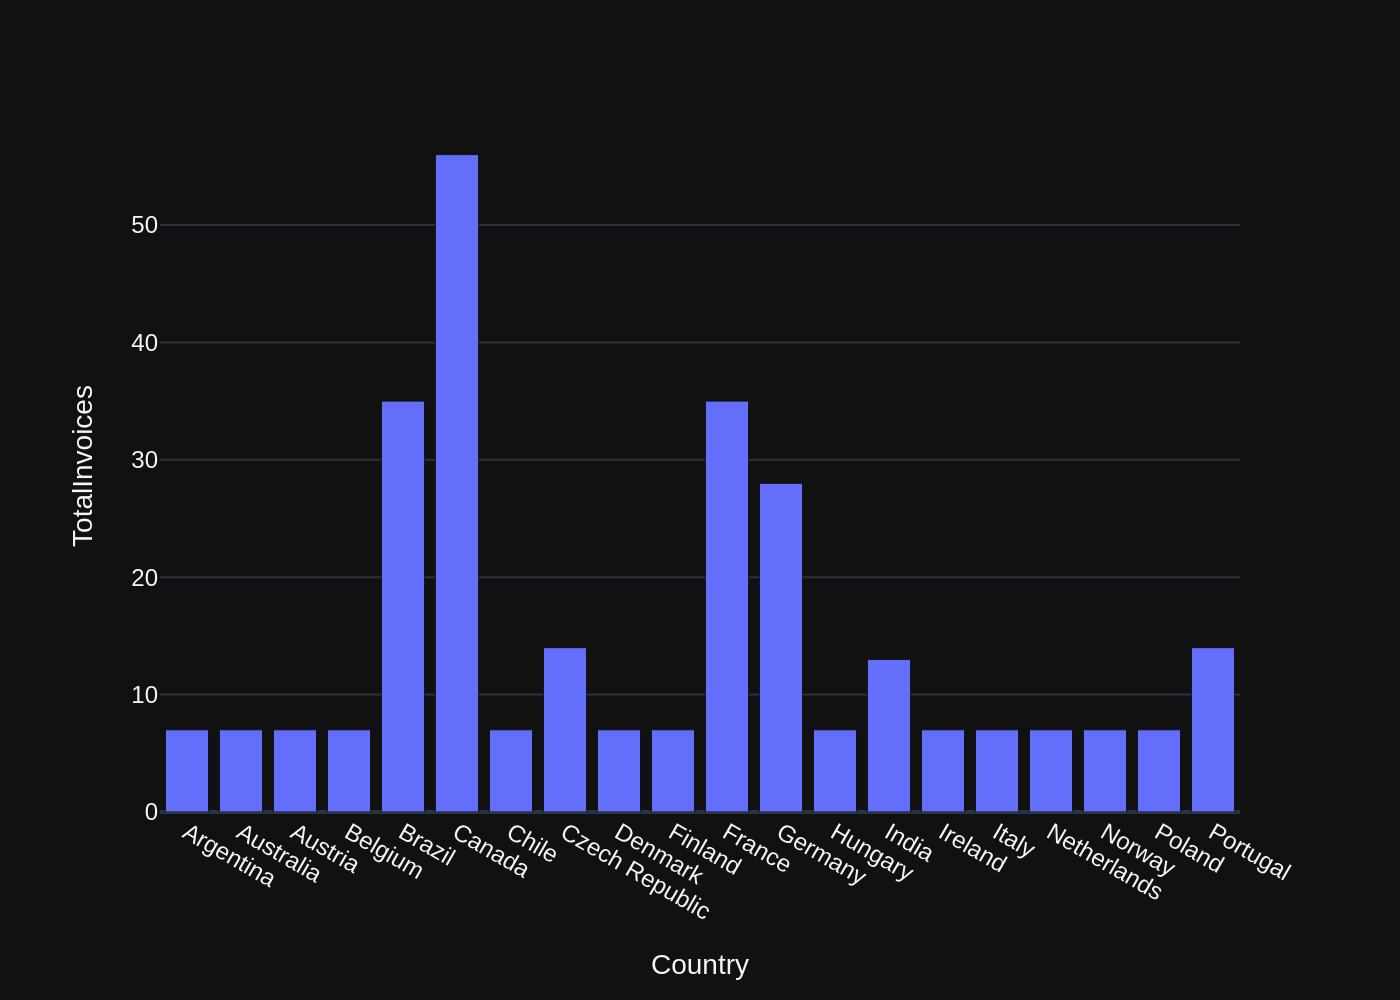





# QUESTION  - 10:  List all invoices with a total exceeding $10



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT *
FROM "invoices"
WHERE Total > 10.00 LIMIT 20


[( <DataFrame> )]
queried dataframe



,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
1,12,2,2009-02-11 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,13.86
2,19,40,2009-03-14 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,13.86
3,26,19,2009-04-14 00:00:00,1 Infinite Loop,Cupertino,CA,USA,95014,13.86
4,33,57,2009-05-15 00:00:00,"Calle Lira, 198",Santiago,None,Chile,None,13.86
5,40,36,2009-06-15 00:00:00,Tauentzienstraße 8,Berlin,None,Germany,10789,13.86
6,47,15,2009-07-16 00:00:00,700 W Pender Street,Vancouver,BC,Canada,V6C 1G8,13.86
7,54,53,2009-08-16 00:00:00,113 Lupus St,London,None,United Kingdom,SW1V 3EN,13.86
8,61,32,2009-09-16 00:00:00,696 Osborne Street,Winnipeg,MB,Canada,R3L 2B9,13.86
9,68,11,2009-10-17 00:00:00,"Av. Paulista, 2022",São Paulo,SP,Brazil,01310-200,13.86



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

if df.shape[0] > 1:
    fig = px.scatter(df, x='BillingDate', y='Total')
else:
    fig.add_trace(go.Indicator(
        mode="number",
        value=df['Total'].values[0],
        number={'suffix': 'USD'}
    ))

fig.update_layout(title_text="Invoices with Total Exceeding $10", xaxis_title_text="Date", yaxis_title_text="Total")

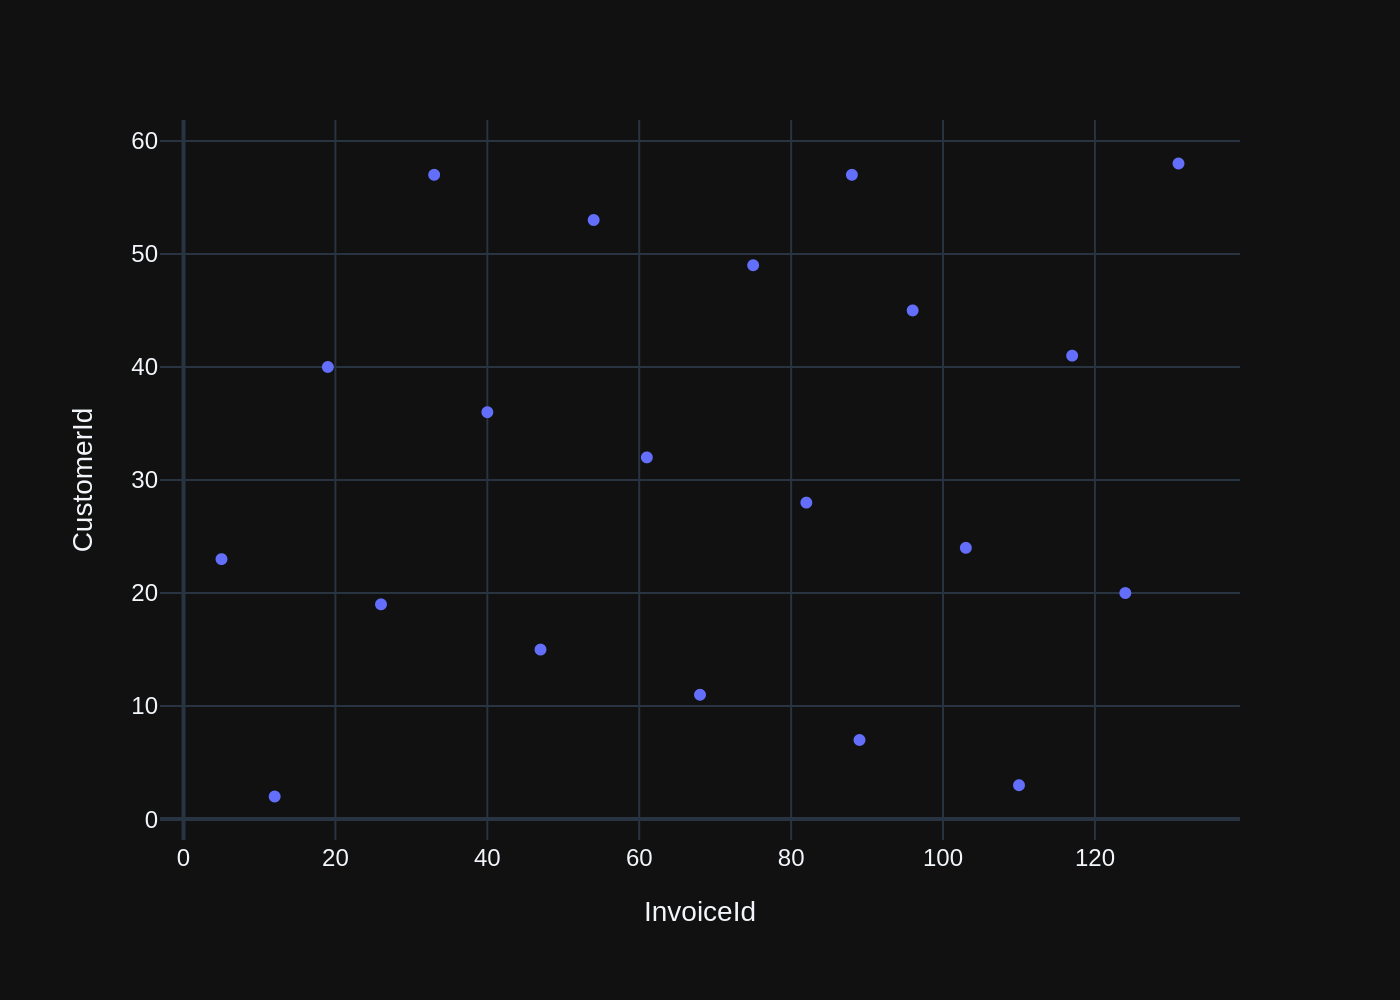





# QUESTION  - 11:  Find all invoices since 2010 and the total amount invoiced:



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT *
FROM "invoices"
WHERE InvoiceDate >= '2010-01-01'
ORDER BY Total DESC


[( <DataFrame> )]
queried dataframe



,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,404,6,2013-11-13 00:00:00,Rilská 3174/6,Prague,None,Czech Republic,14300,25.86
1,299,26,2012-08-05 00:00:00,2211 W Berry Street,Fort Worth,TX,USA,76110,23.86
2,96,45,2010-02-18 00:00:00,Erzsébet krt. 58.,Budapest,None,Hungary,H-1073,21.86
3,194,46,2011-04-28 00:00:00,3 Chatham Street,Dublin,Dublin,Ireland,None,21.86
4,89,7,2010-01-18 00:00:00,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,18.86
5,201,25,2011-05-29 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,18.86
6,88,57,2010-01-13 00:00:00,"Calle Lira, 198",Santiago,None,Chile,None,17.91
7,306,5,2012-09-05 00:00:00,Klanova 9/506,Prague,None,Czech Republic,14700,16.86
8,313,43,2012-10-06 00:00:00,"68, Rue Jouvence",Dijon,None,France,21000,16.86
9,103,24,2010-03-21 00:00:00,162 E Superior Street,Chicago,IL,USA,60611,15.86



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='InvoiceDate', y='Total')

fig.update_layout(title_text="Invoices by Date", title_font_size=24)

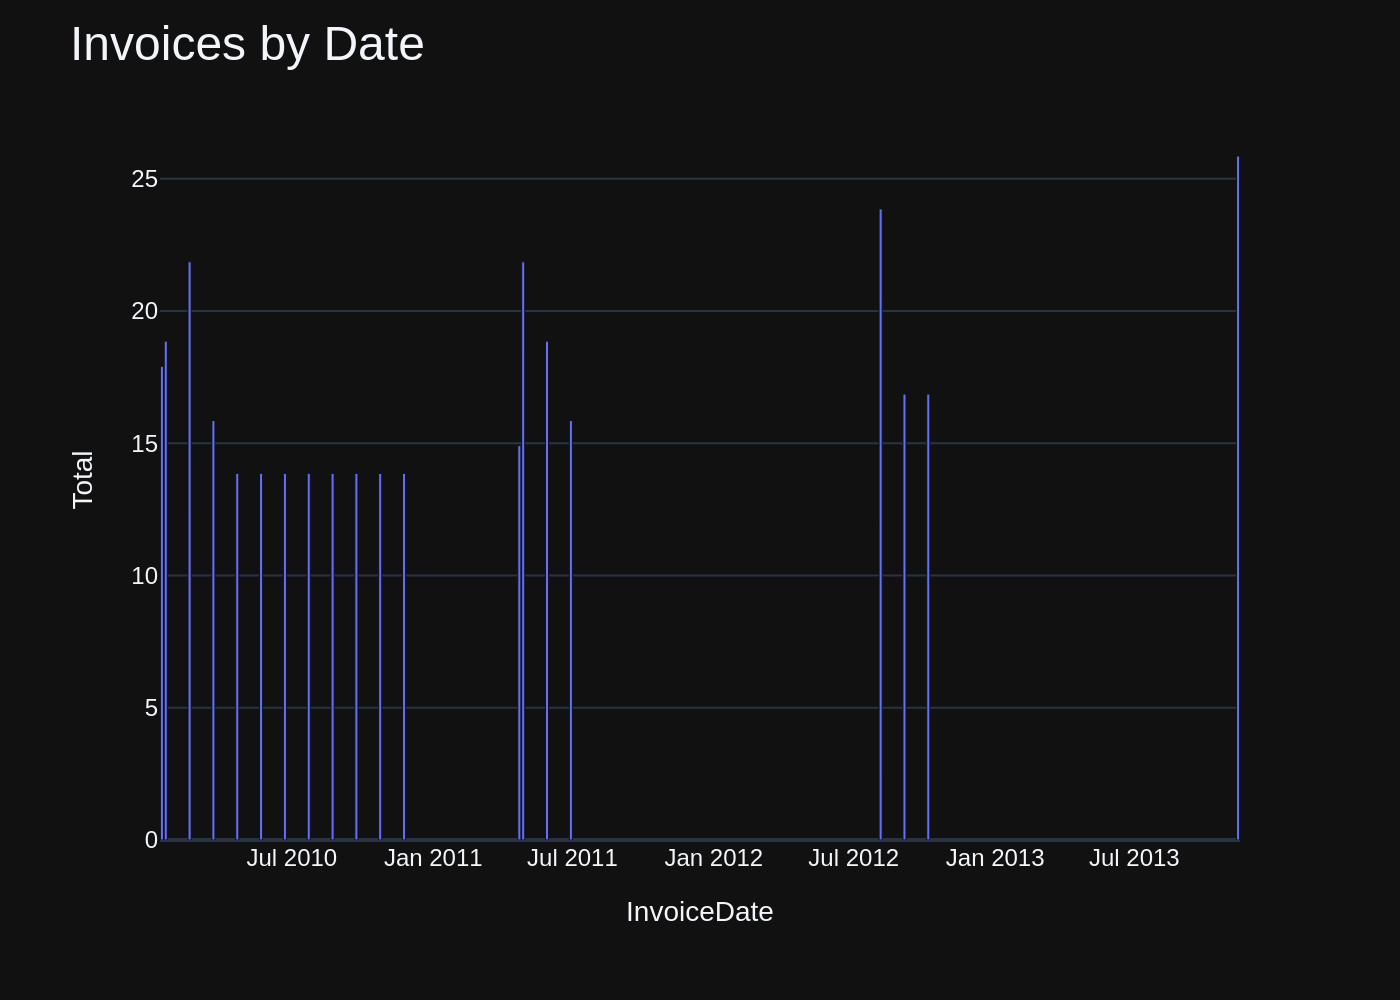





# QUESTION  - 12:  List all employees and their reporting manager's name (if any):



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT e.LastName, e.FirstName, 
       COALESCE(e1.LastName, '') AS ReportsTo
FROM "employees" e
LEFT JOIN "employees" e1 ON e.ReportsTo = e1.EmployeeId LIMIT 20


[( <DataFrame> )]
queried dataframe



,LastName,FirstName,ReportsTo
0,Adams,Andrew,
1,Edwards,Nancy,Adams
2,Peacock,Jane,Edwards
3,Park,Margaret,Edwards
4,Johnson,Steve,Edwards
5,Mitchell,Michael,Adams
6,King,Robert,Mitchell
7,Callahan,Laura,Mitchell



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
fig = px.bar(df, x='LastName', y='FirstName', color='ReportsTo')
fig.update_layout(title="Employees and their Reporting Manager")

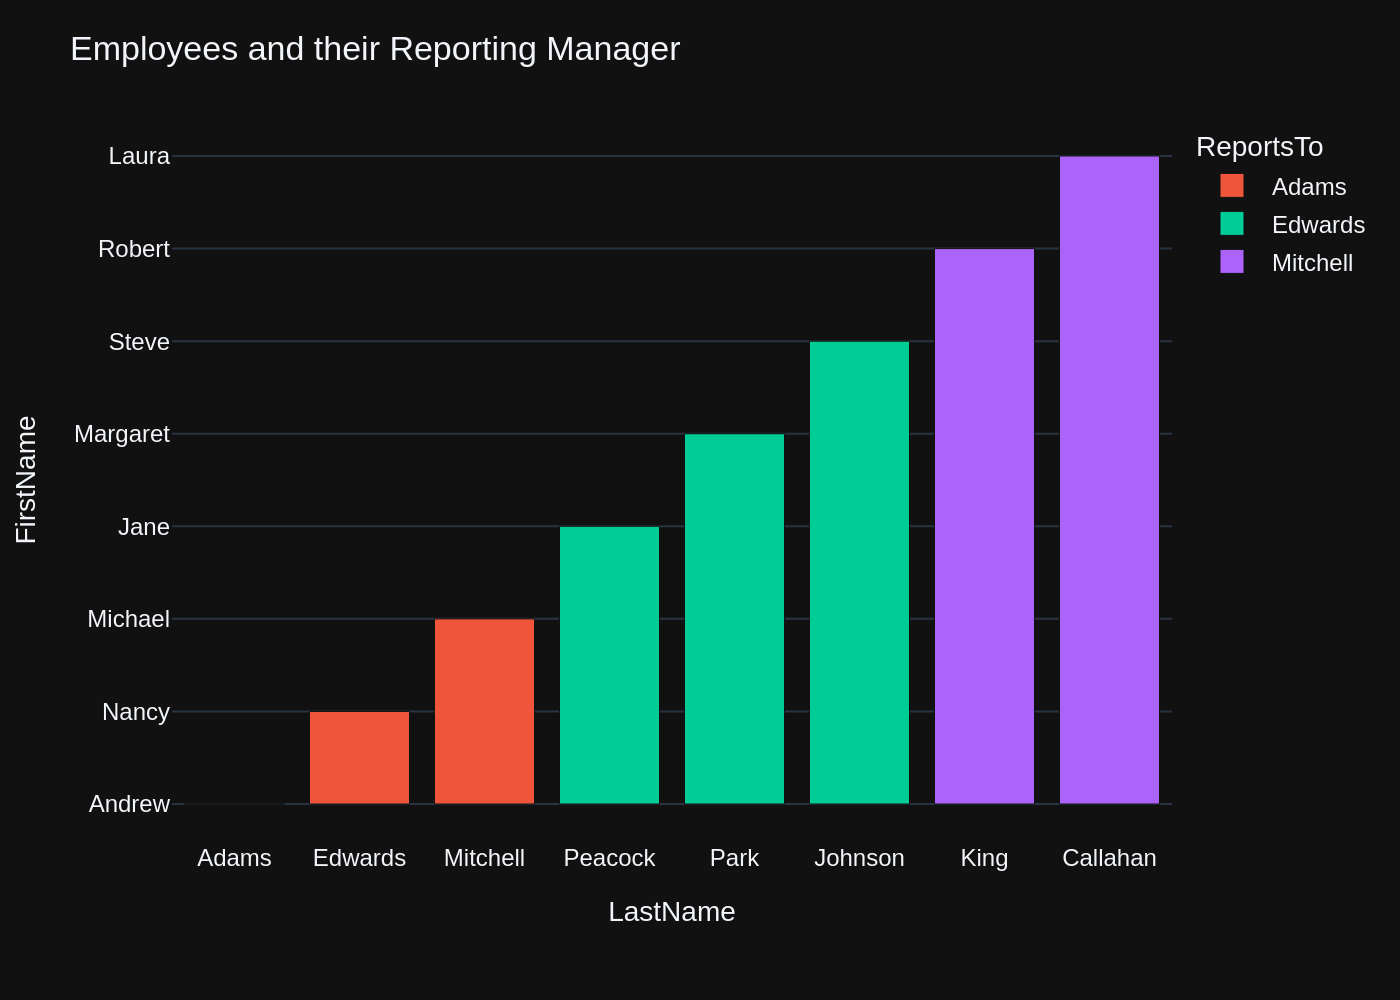





# QUESTION  - 13:   Get the average invoice total for each customer:



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT c.FirstName, c.LastName, AVG(i.Total) AS AvgInvoiceTotal
FROM "customers" c
JOIN "invoices" i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId, c.FirstName, c.LastName LIMIT 20


[( <DataFrame> )]
queried dataframe



,FirstName,LastName,AvgInvoiceTotal
0,Luís,Gonçalves,5.660000
1,Leonie,Köhler,5.374286
2,François,Tremblay,5.660000
3,Bjørn,Hansen,5.660000
4,František,Wichterlová,5.802857
5,Helena,Holý,7.088571
6,Astrid,Gruber,6.088571
7,Daan,Peeters,5.374286
8,Kara,Nielsen,5.374286
9,Eduardo,Martins,5.374286



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='FirstName', y='AvgInvoiceTotal', title='Average Invoice Total by Customer')

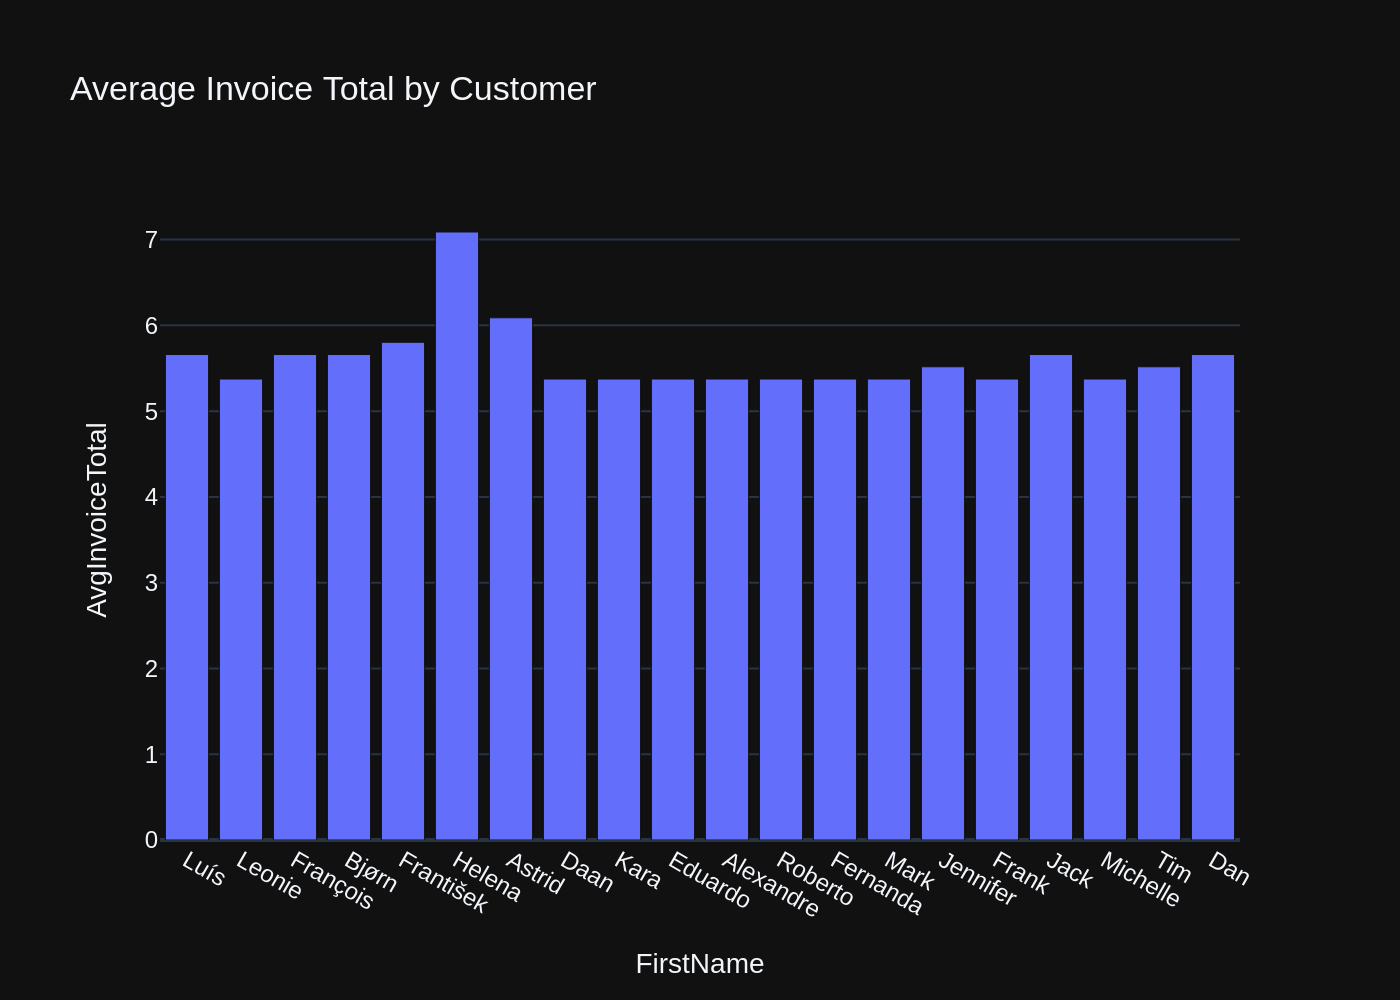





# QUESTION  - 14:  Find the top 5 most expensive tracks (based on unit price):



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT t.TrackId, t.Name, t.MediaTypeId, t.UnitPrice
FROM "tracks" t
ORDER BY t.UnitPrice DESC
LIMIT 5


[( <DataFrame> )]
queried dataframe



,TrackId,Name,MediaTypeId,UnitPrice
0,2819,Battlestar Galactica: The Story So Far,3,1.99
1,2820,Occupation / Precipice,3,1.99
2,2821,"Exodus, Pt. 1",3,1.99
3,2822,"Exodus, Pt. 2",3,1.99
4,2823,Collaborators,3,1.99



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
fig = px.bar(df, x='Name', y='UnitPrice', title='Top 5 Most Expensive Tracks')
fig.update_layout(xaxis_title='Track Name', yaxis_title='Unit Price')

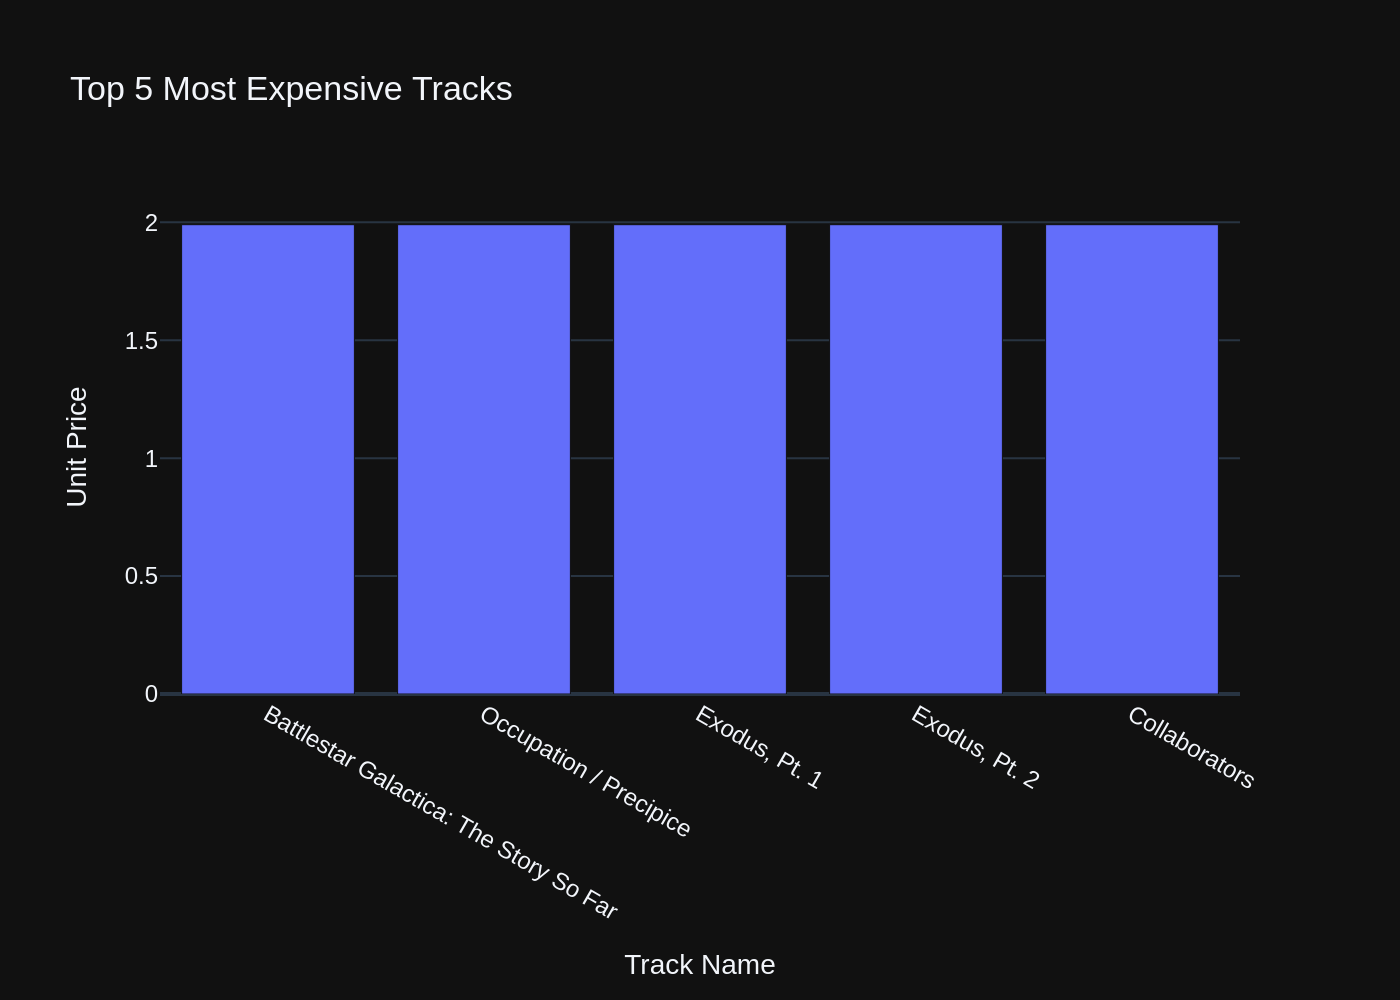





# QUESTION  - 15:  List all genres and the number of tracks in each genre:



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT g.Name, COUNT(t.TrackId) AS TrackCount
FROM "genres" g
JOIN "tracks" t ON g.GenreId = t.GenreId
GROUP BY g.GenreId, g.Name LIMIT 20


[( <DataFrame> )]
queried dataframe



,Name,TrackCount
0,Rock,1297
1,Jazz,130
2,Metal,374
3,Alternative & Punk,332
4,Rock And Roll,12
5,Blues,81
6,Latin,579
7,Reggae,58
8,Pop,48
9,Soundtrack,43



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
import pandas as pd

fig = px.bar(df, x='Name', y='TrackCount')
fig.update_layout(title='Number of Tracks by Genre')

if df.shape[0] == 1:
    fig = px.imshow([[df['TrackCount'].values]], 
                    color_continuous_scale="Viridis")
    fig.update_layout(title_text="One Value in DataFrame")

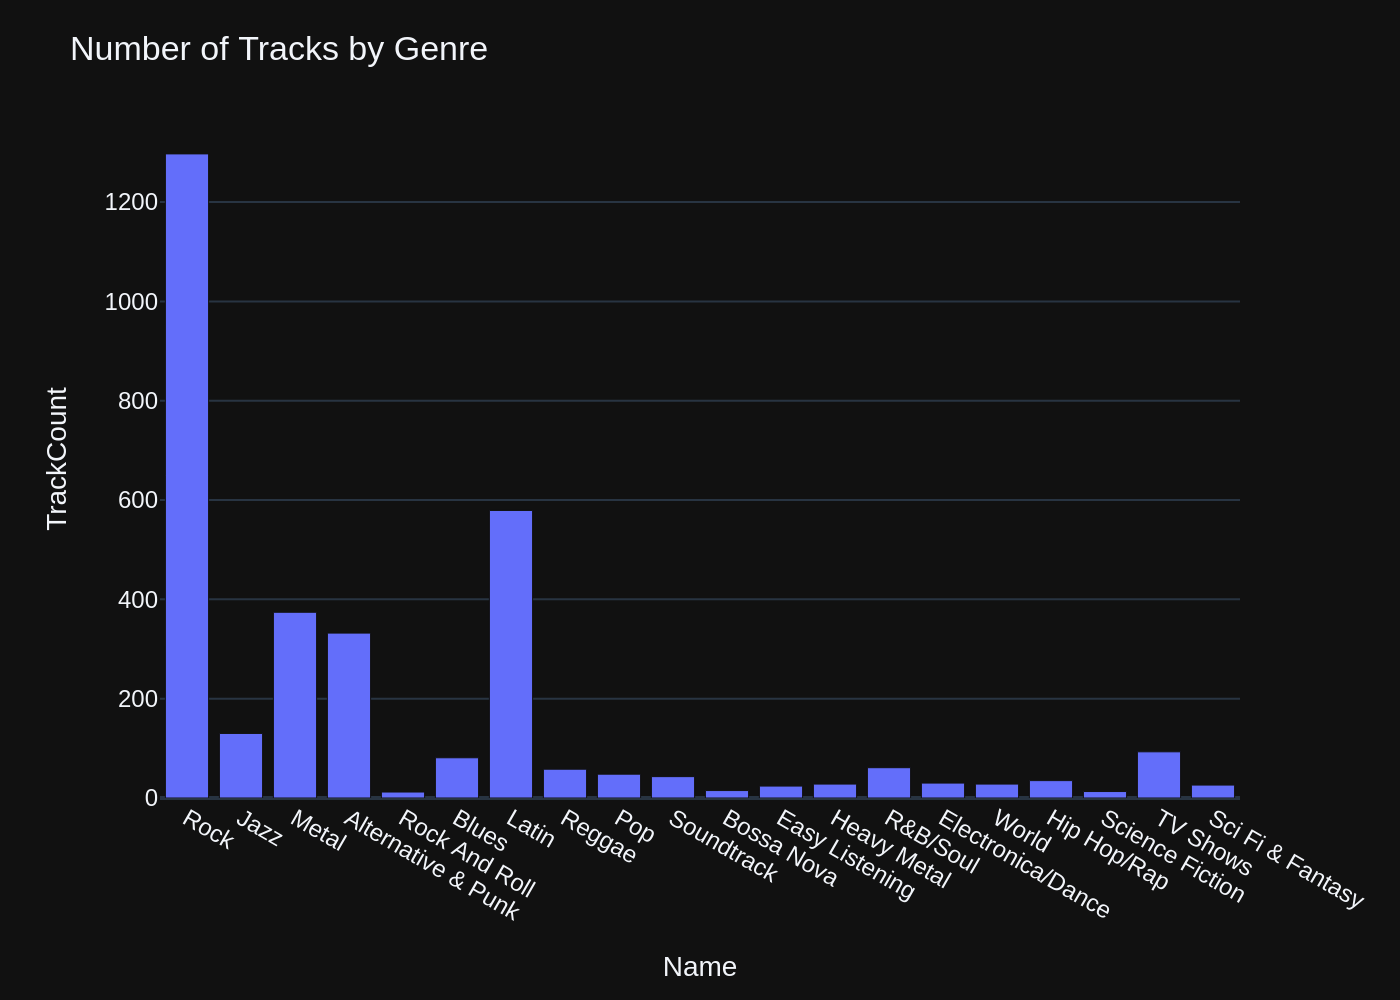





# QUESTION  - 16:  Get all genres that do not have any tracks associated with them:



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT g.Name
FROM "genres" g
WHERE NOT EXISTS (
  SELECT 1
  FROM "tracks" t
  WHERE g.GenreId = t.GenreId
) LIMIT 20


[( <DataFrame> )]
queried dataframe



,Name



[( RETRY )]
***** 1 *****


Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 2 *****


Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 3 *****


Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
with that!

To get all genres that do not have any tracks associated with them, we need to join the "tracks" table with the "genres" table on the GenreId column, then count the number of tracks for each genre. Finally, we'll select only those genres where the track count is 0.

Here's the corrected SQL statement:

```sql
SELECT g.Name 
FROM "genres" g 
LEFT JOIN "tracks" t ON g.GenreId = t.GenreId 
WHERE t.TrackId IS NULL;


[( <SQL> )]
generated SQL statement



with that!

To get all genres that do not have any tracks associated with them, we need to join the "tracks" table with the "genres" table on the GenreId column, then count the number of tracks for each genre. Finally, we'll select only those genres where the track count is 0.

Here's the corrected SQL statement:

```sql
SELECT g.Name 
FROM "genres" g 
LEFT JOIN "tracks" t ON g.GenreId = t.GenreId 
WHERE t.TrackId IS NULL;





# QUESTION  - 17:  List all customers who have not placed any orders:



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT *
FROM "customers"
WHERE CustomerId NOT IN (SELECT i.CustomerId FROM "invoices" i)


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId



[( RETRY )]
***** 1 *****


Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT *
FROM "customers" c
WHERE NOT EXISTS (
  SELECT 1
  FROM "invoices" i
  WHERE i.CustomerId = c.CustomerId
)



[( <SQL> )]
generated SQL statement



SELECT *
FROM "customers" c
WHERE NOT EXISTS (
  SELECT 1
  FROM "invoices" i
  WHERE i.CustomerId = c.CustomerId
)


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId



[( RETRY )]
***** 2 *****


Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
with SQLite, I'll provide a SQL query that should give you the desired result.

To list all customers who have not placed any orders, you can use the following query:

```sql
SELECT *
FROM "customers" c
WHERE c.CustomerId NOT IN (SELECT i.CustomerId FROM "invoices" i);


[( <SQL> )]
generated SQL statement



with SQLite, I'll provide a SQL query that should give you the desired result.

To list all customers who have not placed any orders, you can use the following query:

```sql
SELECT *
FROM "customers" c
WHERE c.CustomerId NOT IN (SELECT i.CustomerId FROM "invoices" i);


[( RETRY )]
***** 3 *****


Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None





# QUESTION  - 18:   
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT a.Name, COUNT(t.TrackId) AS TrackCount
FROM "artists" a
JOIN "albums" al ON a.ArtistId = al.ArtistId
JOIN "tracks" t ON al.AlbumId = t.AlbumId
GROUP BY a.ArtistId, a.Name
ORDER BY TrackCount DESC
LIMIT 10


[( <DataFrame> )]
queried dataframe



,Name,TrackCount
0,Iron Maiden,213
1,U2,135
2,Led Zeppelin,114
3,Metallica,112
4,Deep Purple,92
5,Lost,92
6,Pearl Jam,67
7,Lenny Kravitz,57
8,Various Artists,56
9,The Office,53



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
fig = px.bar(df, x='Name', y='TrackCount')
fig.update_layout(title_text='Top 10 Most Popular Artists by Track Count')

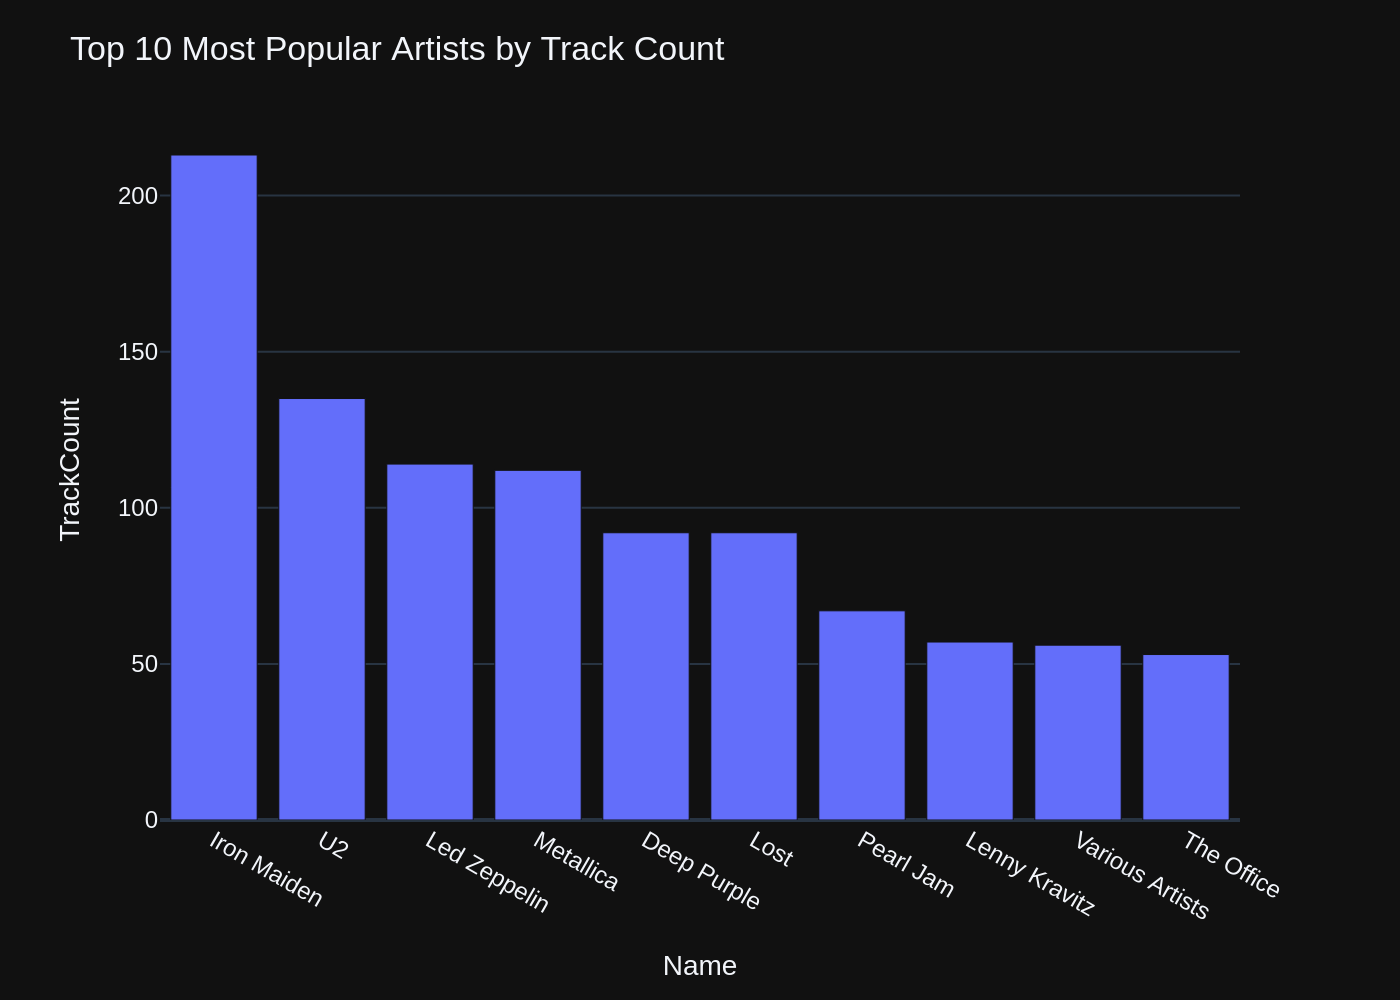





# QUESTION  - 19:  List all customers from Canada and their email addresses:



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT c.Email, c.FirstName, c.LastName
FROM "customers" c
WHERE c.Country = 'Canada'
ORDER BY c.Email, c.FirstName, c.LastName LIMIT 20


[( <DataFrame> )]
queried dataframe



,Email,FirstName,LastName
0,aaronmitchell@yahoo.ca,Aaron,Mitchell
1,edfrancis@yachoo.ca,Edward,Francis
2,ellie.sullivan@shaw.ca,Ellie,Sullivan
3,ftremblay@gmail.com,François,Tremblay
4,jenniferp@rogers.ca,Jennifer,Peterson
5,marthasilk@gmail.com,Martha,Silk
6,mphilips12@shaw.ca,Mark,Philips
7,robbrown@shaw.ca,Robert,Brown



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='FirstName', y='Email', color='LastName', barmode='group')

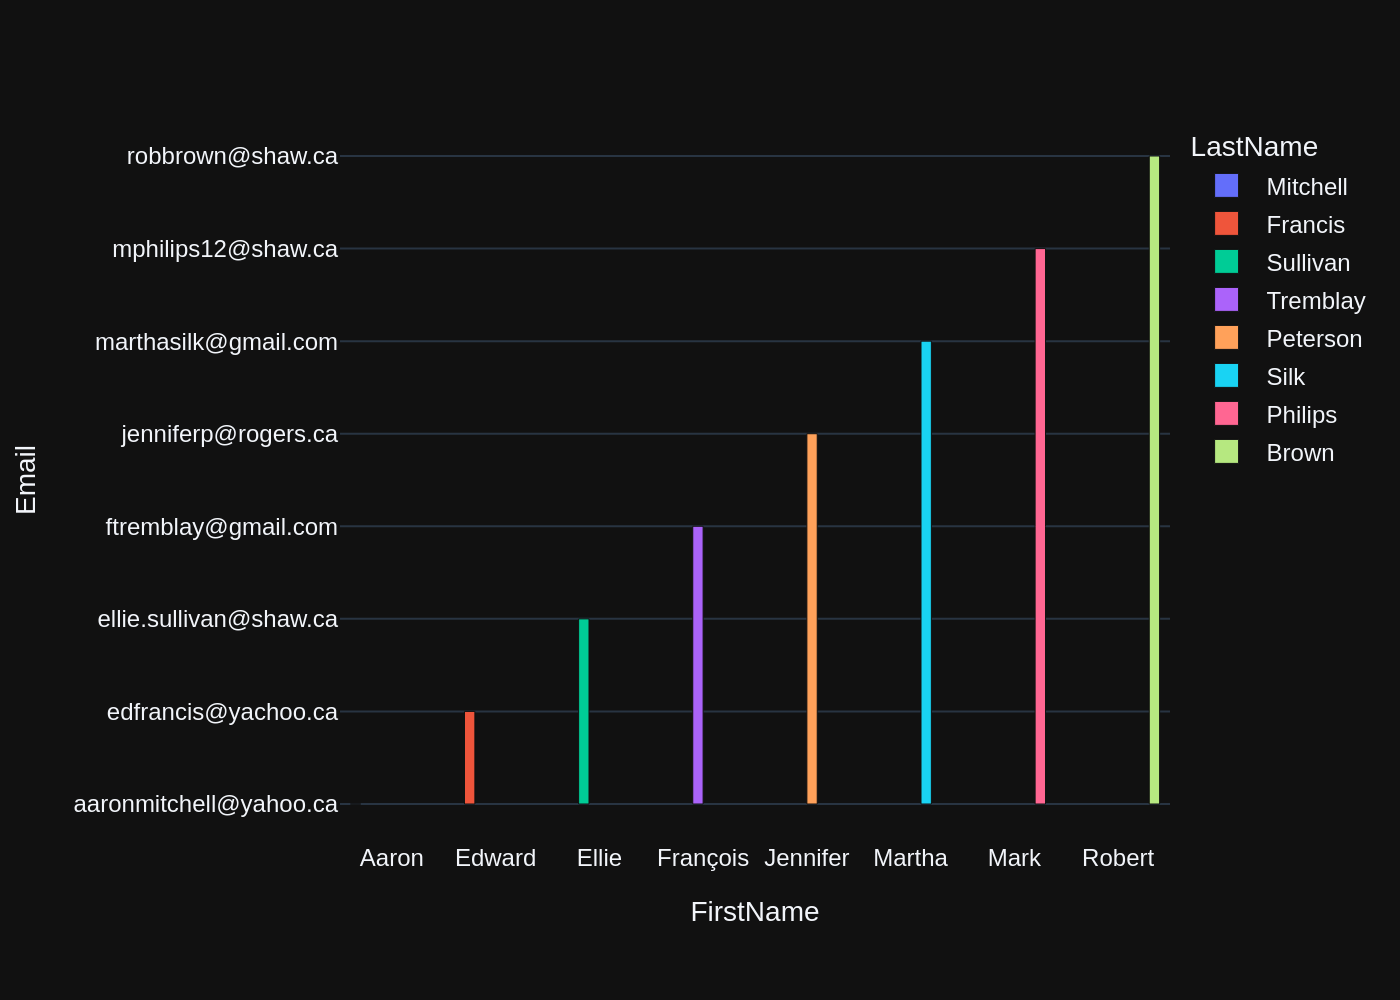





# QUESTION  - 20:  Find the customer with the most invoices 



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT c.FirstName, c.LastName
FROM "customers" c
JOIN "invoices" i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId, c.FirstName, c.LastName
ORDER BY COUNT(i.InvoiceId) DESC LIMIT 1


[( <DataFrame> )]
queried dataframe



,FirstName,LastName
0,Luís,Gonçalves



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
import pandas as pd

fig = px.bar(df, x="FirstName", y="LastName")
fig.update_layout(title_text='Customer with most invoices', title_font_size=24)

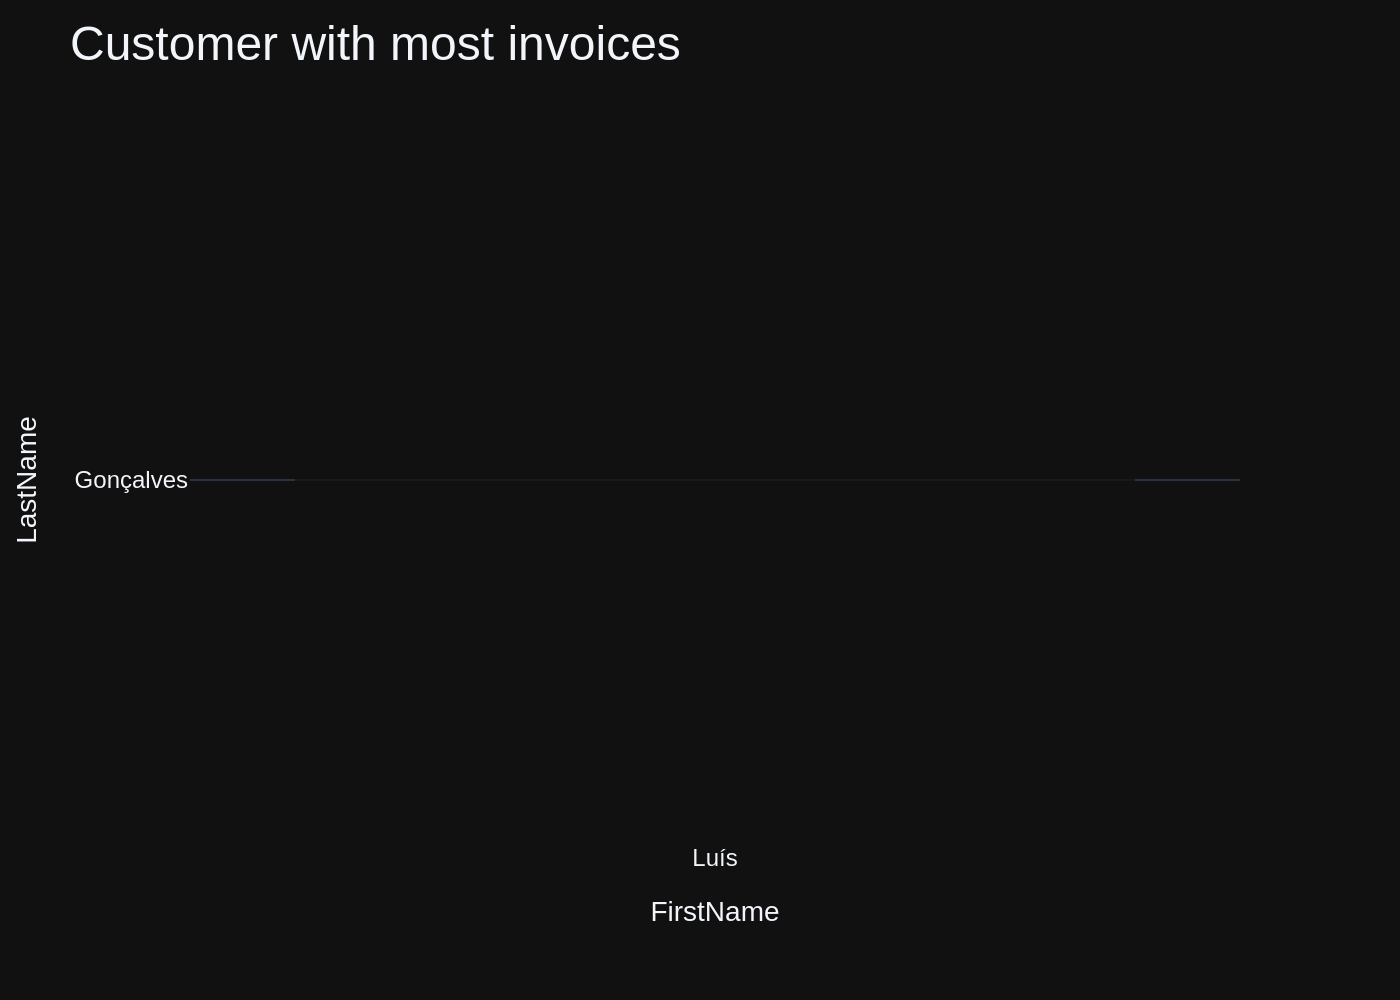





# QUESTION  - 21:  Find the customer who bought the most albums in total quantity (across all invoices):



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT c.FirstName, c.LastName, SUM(i.Quantity) AS TotalQuantity
FROM "customers" c
JOIN "invoices" i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId, c.FirstName, c.LastName
ORDER BY TotalQuantity DESC LIMIT 1


[( RETRY )]
***** 1 *****


Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT c.FirstName, c.LastName, SUM(ii.Quantity) AS TotalQuantity
FROM "customers" c
JOIN "invoices" i ON c.CustomerId = i.CustomerId
JOIN "invoice_items" ii ON i.InvoiceId = ii.InvoiceId
GROUP BY c.CustomerId, c.FirstName, c.LastName
ORDER BY TotalQuantity DESC LIMIT 1



[( <SQL> )]
generated SQL statement



SELECT c.FirstName, c.LastName, SUM(ii.Quantity) AS TotalQuantity
FROM "customers" c
JOIN "invoices" i ON c.CustomerId = i.CustomerId
JOIN "invoice_items" ii ON i.InvoiceId = ii.InvoiceId
GROUP BY c.CustomerId, c.FirstName, c.LastName
ORDER BY TotalQuantity DESC LIMIT 1


[( <DataFrame> )]
queried dataframe



,FirstName,LastName,TotalQuantity
0,Luís,Gonçalves,38



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x="FirstName", y="TotalQuantity")
fig.update_layout(title='Customer who bought the most albums')

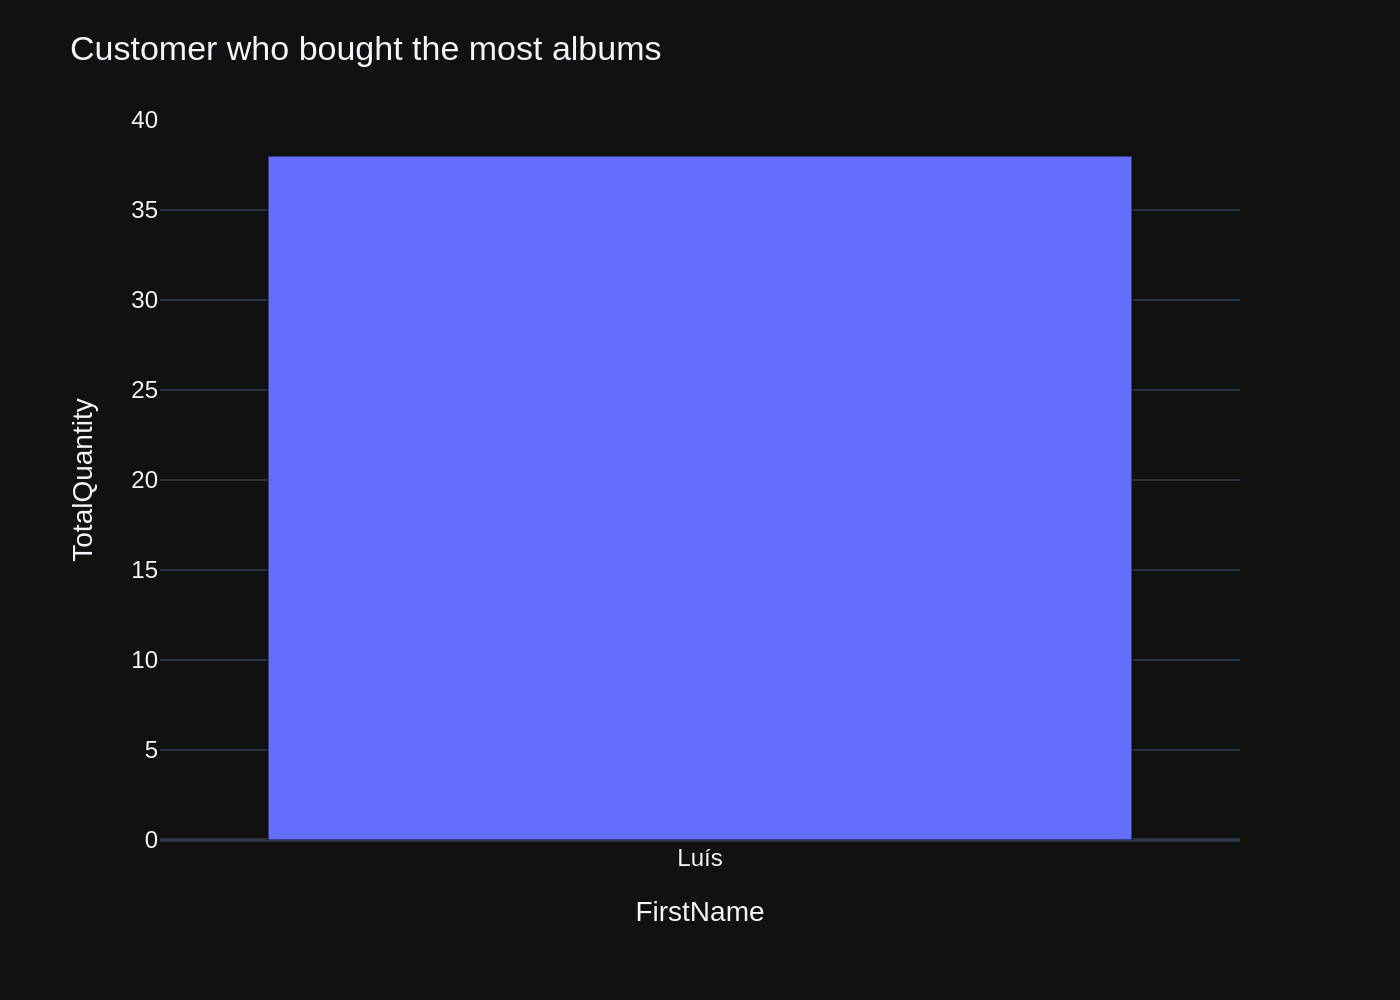





# QUESTION  - 22:        
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT c.FirstName, c.LastName, SUM(ii.Quantity) AS TotalAlbums
FROM "customers" c
JOIN "invoices" i ON c.CustomerId = i.CustomerId
JOIN "invoice_items" ii ON i.InvoiceId = ii.InvoiceId
GROUP BY c.CustomerId, c.FirstName, c.LastName
ORDER BY TotalAlbums DESC
LIMIT 5


[( <DataFrame> )]
queried dataframe



,FirstName,LastName,TotalAlbums
0,Luís,Gonçalves,38
1,Leonie,Köhler,38
2,François,Tremblay,38
3,Bjørn,Hansen,38
4,František,Wichterlová,38



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
fig = px.bar(df, x="FirstName", y="TotalAlbums", color="LastName")
fig.update_layout(title='Top 5 Customers Who Bought Most Albums', xaxis_title='Customer Name', yaxis_title='Total Album Quantity')

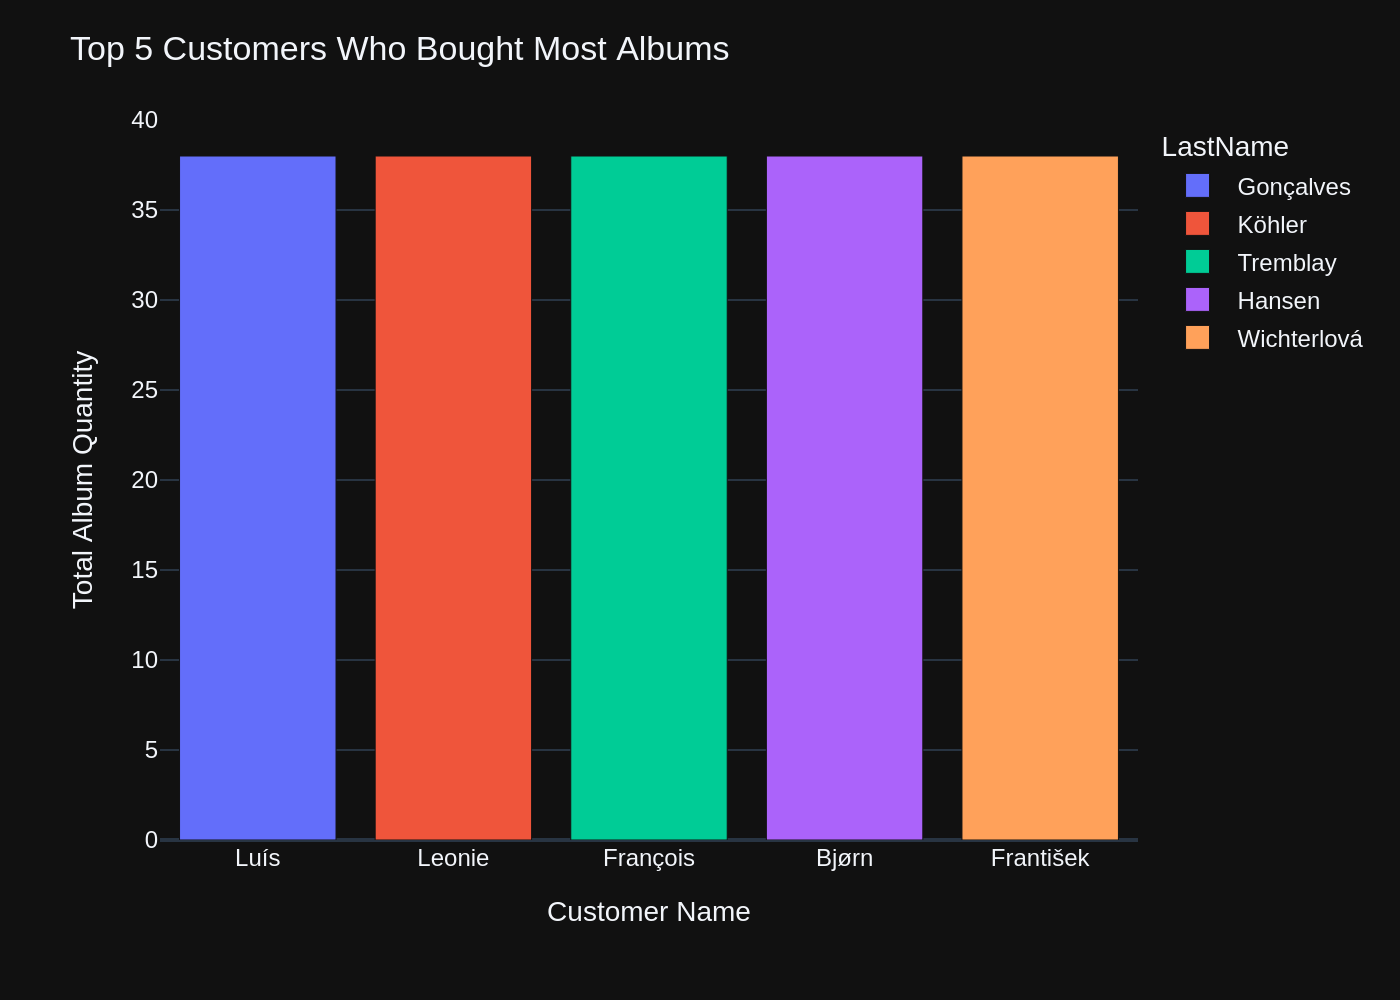





# QUESTION  - 23:    
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT c.FirstName, c.LastName, SUM(i.Total) AS TotalSpent
FROM "customers" c
JOIN "invoices" i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId, c.FirstName, c.LastName
ORDER BY TotalSpent DESC LIMIT 5


[( <DataFrame> )]
queried dataframe



,FirstName,LastName,TotalSpent
0,Helena,Holý,49.62
1,Richard,Cunningham,47.62
2,Luis,Rojas,46.62
3,Ladislav,Kovács,45.62
4,Hugh,O'Reilly,45.62



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



```
import plotly.express as px

fig = px.bar(df, x='FirstName', y='TotalSpent', title='Top 5 Customers by Total Spent')

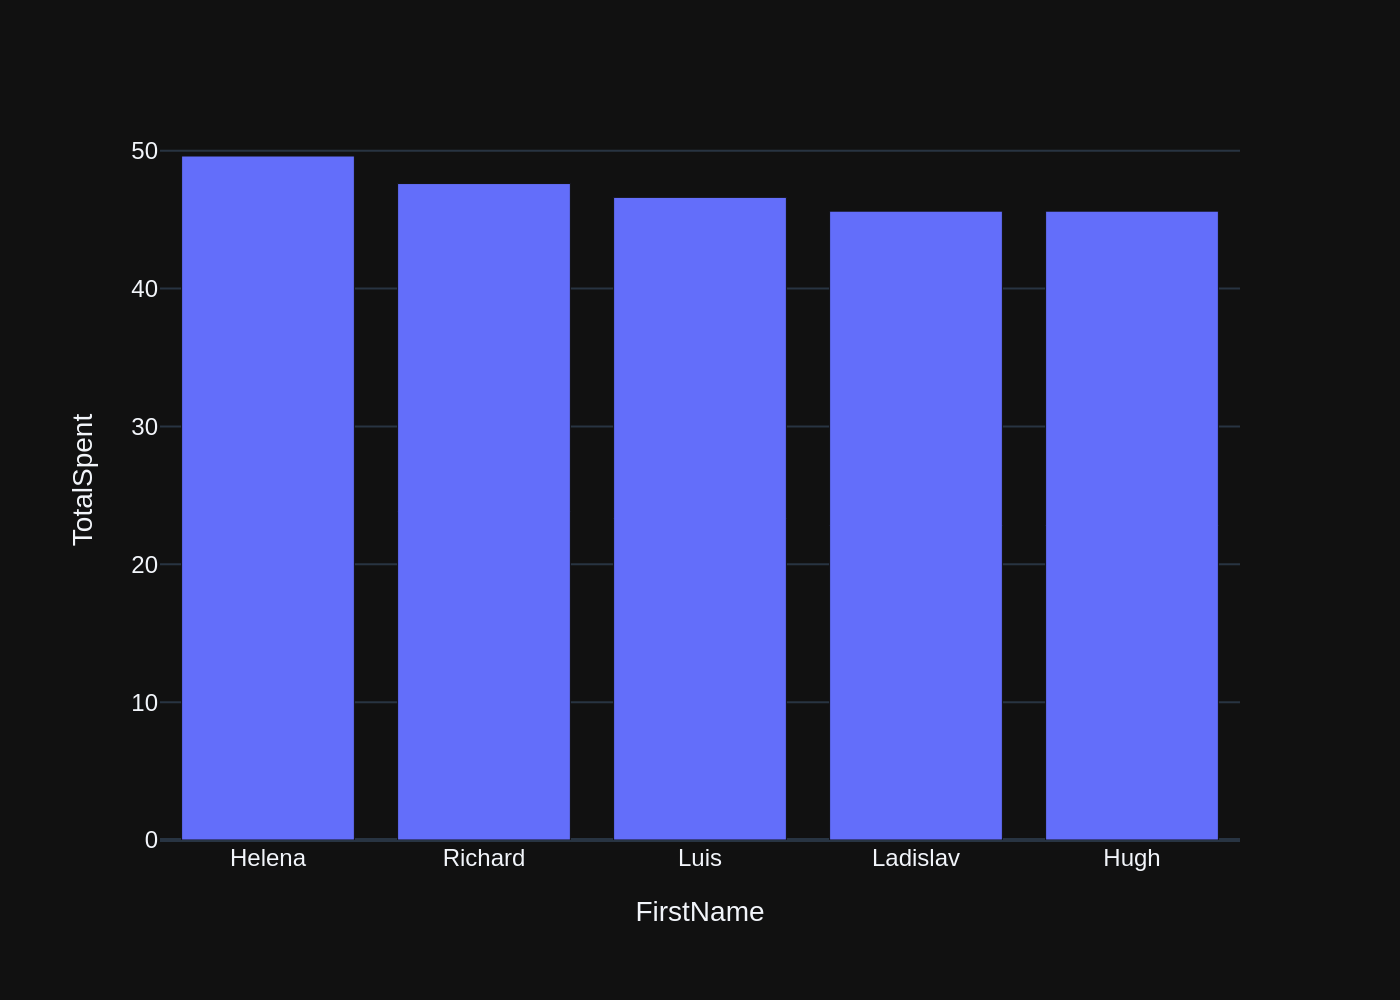





# QUESTION  - 24:  Get all playlists containing at least 10 tracks and the total duration of those tracks:



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT p.PlaylistId, p.Name, SUM(t.Milliseconds) AS TotalDuration
FROM "playlists" p
JOIN "playlist_track" pt ON p.PlaylistId = pt.PlaylistId
JOIN "tracks" t ON pt.TrackId = t.TrackId
GROUP BY p.PlaylistId, p.Name
HAVING COUNT(pt.TrackId) >= 10 LIMIT 20


[( <DataFrame> )]
queried dataframe



,PlaylistId,Name,TotalDuration
0,1,Music,877683083
1,3,TV Shows,501094957
2,5,90’s Music,398705153
3,8,Music,877683083
4,10,TV Shows,501094957
5,11,Brazilian Music,9486559
6,12,Classical,21770592
7,13,Classical 101 - Deep Cuts,6755730
8,14,Classical 101 - Next Steps,7575051
9,15,Classical 101 - The Basics,7439811



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
import numpy as np

fig = px.bar(df, x='Name', y='TotalDuration')

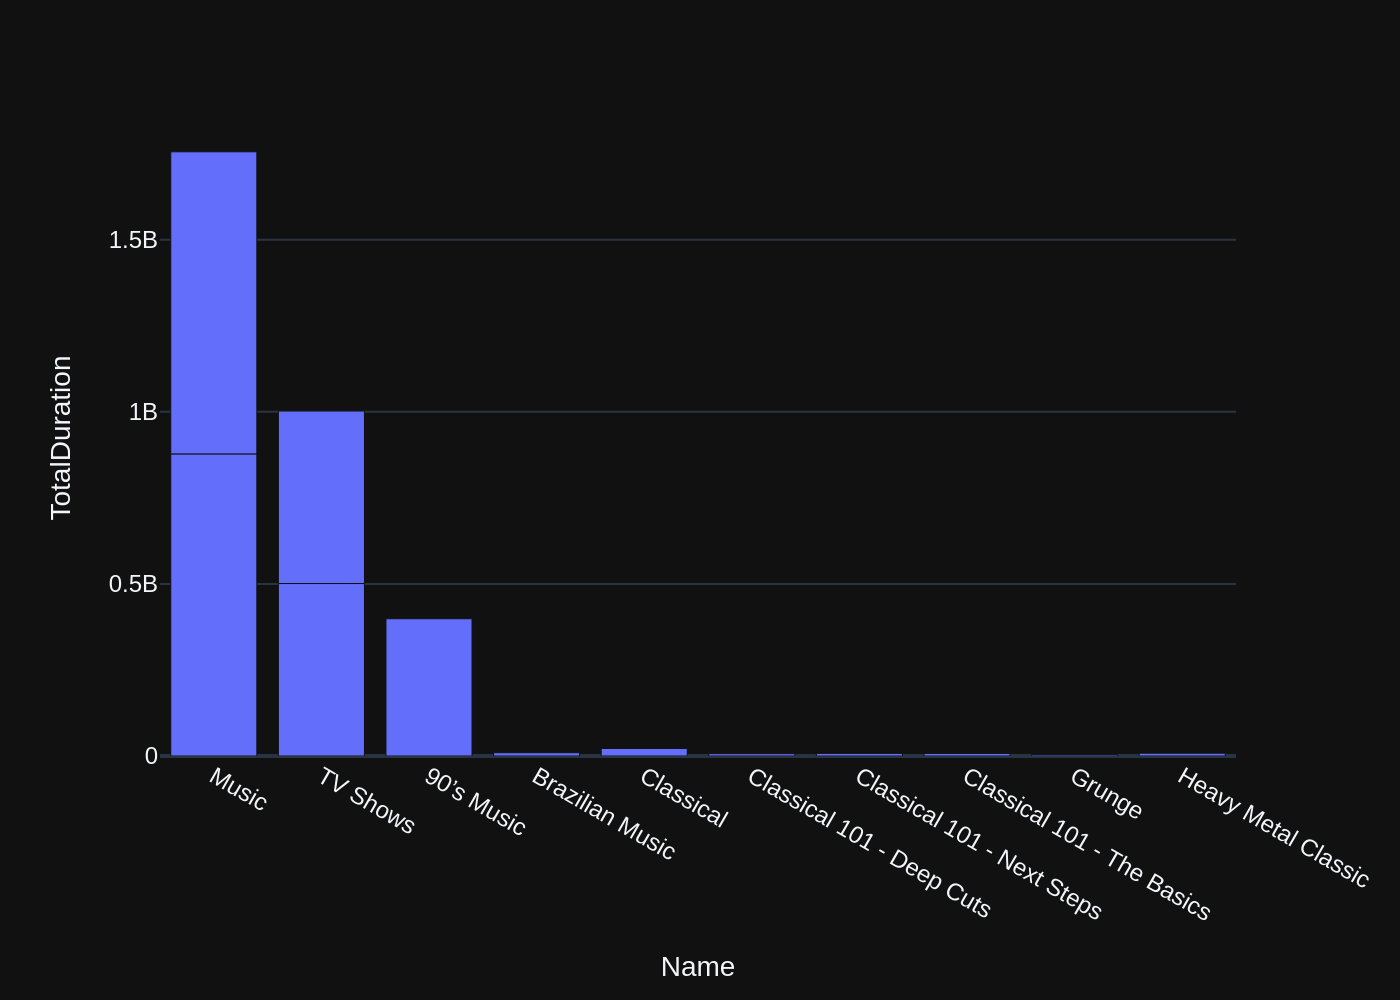





# QUESTION  - 25:  Identify artists who have albums with tracks appearing in multiple genres:



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT a.Name
FROM "artists" a
JOIN "albums" al ON a.ArtistId = al.ArtistId
JOIN "tracks" t ON al.AlbumId = t.AlbumId
WHERE t.GenreId IN (SELECT GenreId FROM "genres")
GROUP BY a.Name, a.ArtistId
HAVING COUNT(DISTINCT t.GenreId) > 1


[( <DataFrame> )]
queried dataframe



,Name
0,Antônio Carlos Jobim
1,Audioslave
2,Various Artists
3,Gilberto Gil
4,Eric Clapton
5,Faith No More
6,Foo Fighters
7,Guns N' Roses
8,Iron Maiden
9,Jamiroquai



Ollama parameters:
model=llama3:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px
import pandas as pd

fig = px.bar(df, x='Name', y='', title='Artists with Multiple Genres')
fig.update_layout(xaxis_title="Artist", yaxis_title="", template="simple_white")

if df.shape[0] == 1:
    fig.update_layout(yaxis=dict(tickformat=".0"))
else:

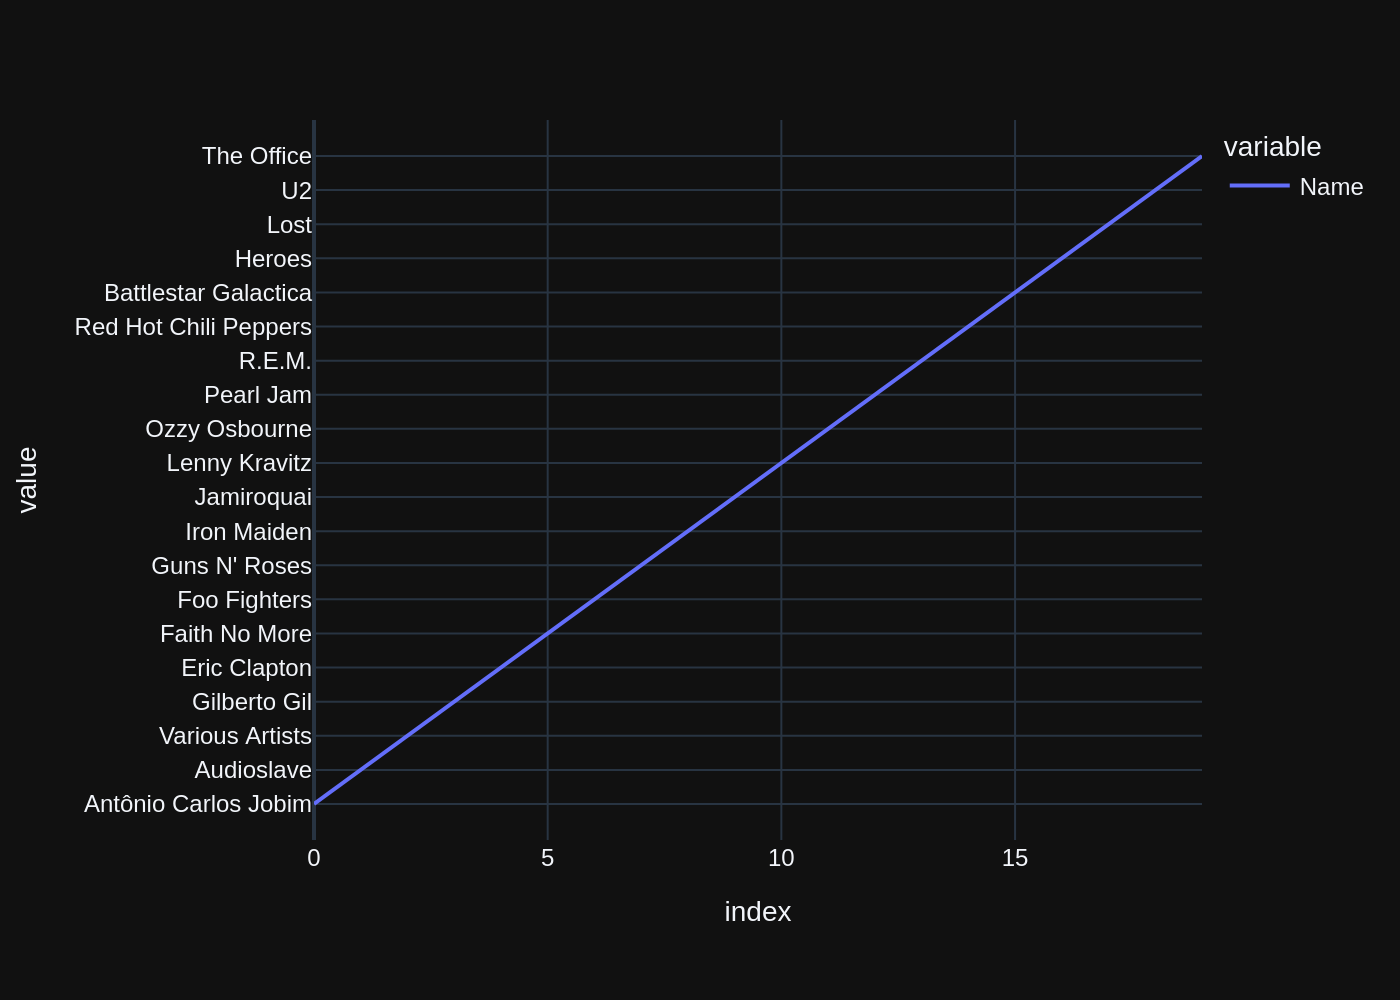

In [16]:
ts_start = time()
for n, question in enumerate(questions):
    # if n != 4: continue
    # if n > 5: continue

    resp = vn.ask_adaptive(question=question, tag_id=n+2)
    # vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    # my_vn_ask(question=question, sql_id=n+2, allow_llm_to_see_data=allow_llm_to_see_data)

ts_stop = time()
elapsed_time = ts_stop - ts_start

### Check completion time

In [17]:
elapsed_time

126.44104385375977

In [18]:
str_elapsed_sec = f"{elapsed_time:.0f}"
ts = datetime.now().strftime("%Y%m%d-%H%M%S")
print(f"Completed testing:\n================\n LLM model '{model_name}' \n took {str_elapsed_sec} sec\n run on '{hostname}' \n at {ts}")

Completed testing:
 LLM model 'llama3' 
 took 126 sec
 run on 'ducklover1' 
 at 20241121-233242


In [19]:
file_csv = f"training_data-{model_name}-{str_elapsed_sec}s-{hostname}-{ts}.csv"
file_csv

'training_data-llama3-126s-ducklover1-20241121-233242.csv'

### Save training data

In [20]:
# show training data
df_training_data = vn.get_training_data()
df_training_data

,id,question,content,training_data_type
0,2c5fdfa9-93bb-58bb-98de-cf8d4ed15db5-sql,\n Generating SQL for this ...,"SELECT c.FirstName, c.LastName, SUM(ii.Quantit...",sql
1,4466d6c0-e860-5aa0-94c4-86b3c1ff001d-sql,Identify artists who have albums with tracks a...,"SELECT a.Name\nFROM ""artists"" a\nJOIN ""albums""...",sql
2,4c10af17-66a0-55c0-a11b-9a37aa92ea50-sql,\n Can you find the top 10 most popula...,"SELECT a.Name, COUNT(t.TrackId) AS TrackCount\...",sql
3,4f2e0a38-a0c5-5b0e-8d58-c17f6ac250ce-sql,what are the top 5 countries that customers co...,"SELECT country, COUNT(*) AS total_customers\nF...",sql
4,54d002df-7093-5973-bca5-6494d5c748d1-sql,List all albums and their corresponding artist...,"SELECT a.Title, a.ArtistId, ar.Name\nFROM ""alb...",sql
5,5a1d4e33-c210-5376-92c7-fceb19cb27c3-sql,"Find all tracks with a name containing ""What"" ...","SELECT *\nFROM ""tracks""\nWHERE Name LIKE '%wha...",sql
6,60badd56-6d38-5a61-bd91-17c55ecc17d6-sql,\n Find the top 5 customers who spen...,"SELECT c.FirstName, c.LastName, SUM(i.Total) A...",sql
7,655abc43-4801-5f6d-8fd7-e95433326aa0-sql,\n Find the top 5 customers who b...,"SELECT c.FirstName, c.LastName, SUM(ii.Quantit...",sql
8,7779d848-5c06-588e-8ed4-5aad4569cca4-sql,Find the total number of invoices per country,"SELECT c.Country, COUNT(i.InvoiceId) AS TotalI...",sql
9,9072039a-c65e-55a1-b18f-bcf4d046bb38-sql,Get all playlists containing at least 10 track...,"SELECT p.PlaylistId, p.Name, SUM(t.Millisecond...",sql


In [21]:
df_training_data.to_csv(file_csv, index=False)